In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

pd.set_option('display.max_columns', None)


In [2]:
data1 = pd.read_csv('personal_health_data.csv')
data2 = pd.read_csv('digital_interaction_data.csv')
data3 = pd.read_csv('activity_environment_data.csv')

In [3]:
merge_df = pd.merge(data1, data2, on='User_ID', how='left')

In [4]:
final_df = pd.merge(merge_df, data3, on='User_ID', how='left')

In [5]:
final_df.head()

User_ID  Age Gender      Weight      Height Medical_Conditions Medication  \
0  U_00001   61  Other   88.677623  178.524231           Diabetes         No   
1  U_00002   24   Male   86.742084  200.346358                NaN        Yes   
2  U_00003   81  Other   61.656054  195.971356       Hypertension        Yes   
3  U_00004   70  Other  141.513794  164.178216       Hypertension         No   
4  U_00005   30  Other   80.552872  146.920675           Diabetes        Yes   

  Smoker Alcohol_Consumption          Timestamp_x Day_of_Week  Sleep_Duration  \
0     No            Moderate  2021-01-01 00:00:00      Friday        6.518206   
1     No            Moderate  2021-01-01 01:00:00      Friday        7.522446   
2     No            Moderate  2021-01-01 02:00:00      Friday        8.583386   
3     No               Heavy  2021-01-01 03:00:00      Friday        4.425767   
4    Yes               Heavy  2021-01-01 04:00:00      Friday        6.008918   

   Deep_Sleep_Duration  REM_Sleep_Duration  Wakeups Snoring  Heart_Rate  \
0             2.785033            3.733173        4     Yes         147   
1             0.874391            6.648056        2     Yes         147   
2             6.760476            1.822910        2      No         176   
3             2.645596            1.780171        2     Yes         157   
4             4.440672            1.568247        3      No          86   

   Blood_Oxygen_Level       ECG  Calories_Intake  Water_Intake Stress_Level  \
0           90.658505  Abnormal      2444.985808      3.105556     Moderate   
1           97.133360    Normal      2199.777020      2.441118         High   
2           99.555594  Abnormal      2182.755640      1.240341          Low   
3           91.444900    Normal      1451.218888      1.682383     Moderate   
4           96.092103    Normal      1583.562773      1.461862         High   

      Mood  Skin_Temperature  Body_Fat_Percentage  Muscle_Mass  Health_Score  \
0  Neutral         32.752993            17.432985    77.599448     25.992071   
1  Anxious         35.010044            23.957792    71.718936     64.308450   
2      Sad         36.797523            22.995533    59.874936     78.003546   
3    Happy         32.614592            13.410659    67.528098     16.454106   
4    Happy         33.602319            24.920020    54.741487     42.528202   

   Anomaly_Flag          Timestamp_y  Notifications_Received  Screen_Time  \
0             1  2021-01-01 00:00:00                      34     1.854833   
1             0  2021-01-01 01:00:00                      16     0.245456   
2             1  2021-01-01 02:00:00                      41     2.539901   
3             1  2021-01-01 03:00:00                      48     3.078411   
4             0  2021-01-01 04:00:00                      70     2.624290   

             Timestamp  Steps  Calories_Burned  Distance_Covered  \
0  2021-01-01 00:00:00   9146           457.30            7.3168   
1  2021-01-01 01:00:00   9362           468.10            7.4896   
2  2021-01-01 02:00:00     21             1.05            0.0168   
3  2021-01-01 03:00:00  13252           662.60           10.6016   
4  2021-01-01 04:00:00     21             1.05            0.0168   

       Exercise_Type  Exercise_Duration Exercise_Intensity  \
0            Running           1.219675                Low   
1               Yoga           1.378399           Moderate   
2  Strength Training           0.803857           Moderate   
3                NaN           0.000000                NaN   
4               Yoga           0.807389               High   

   Ambient_Temperature  Battery_Level     Altitude  UV_Exposure  
0            27.271525      97.338777  1739.690662     4.069132  
1            24.430288      66.573240  4102.042824     1.723672  
2            29.340574      30.138828  1794.899935     0.135647  
3            25.289230      78.838640  4025.840921     4.408343  
4            21.853590      17.673261  3422.381447   

Hypertension -nadciśnienie

Diabetes- cukrzyk

Timestamp - dokladny czas i godzina zarejestrowania danej

Altitude - wysokosc nad poziomem morza

In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 10000 non-null  object 
 1   Age                     10000 non-null  int64  
 2   Gender                  10000 non-null  object 
 3   Weight                  10000 non-null  float64
 4   Height                  10000 non-null  float64
 5   Medical_Conditions      6696 non-null   object 
 6   Medication              10000 non-null  object 
 7   Smoker                  10000 non-null  object 
 8   Alcohol_Consumption     6640 non-null   object 
 9   Timestamp_x             10000 non-null  object 
 10  Day_of_Week             10000 non-null  object 
 11  Sleep_Duration          10000 non-null  float64
 12  Deep_Sleep_Duration     10000 non-null  float64
 13  REM_Sleep_Duration      10000 non-null  float64
 14  Wakeups                 10000 non-null 

Identyfikacja i analiza wartości odstających.

Analiza proporcji klas w przypadku problemów klasyfikacyjnych

Analiza wartości kategorycznych

In [7]:
print(final_df.describe())

                Age        Weight        Height  Sleep_Duration  \
count  10000.000000  10000.000000  10000.000000    10000.000000   
mean      47.534500     90.371237    170.539415        7.014794   
std       21.892659     34.924593     17.599783        1.736720   
min       10.000000     30.001125    140.001252        4.000285   
25%       28.000000     60.135075    155.422556        5.523986   
50%       47.000000     89.856120    170.729185        6.992782   
75%       67.000000    120.648181    185.740690        8.542130   
max       85.000000    150.978482    200.998406        9.999370   

       Deep_Sleep_Duration  REM_Sleep_Duration       Wakeups    Heart_Rate  \
count         10000.000000        10000.000000  10000.000000  10000.000000   
mean              3.734520            3.280274      2.023800    115.521500   
std               2.131272            2.153436      1.412173     37.805117   
min               0.500598            0.000805      0.000000     50.000000   
25%   

In [8]:
print(final_df.isnull().sum())

User_ID                      0
Age                          0
Gender                       0
Weight                       0
Height                       0
Medical_Conditions        3304
Medication                   0
Smoker                       0
Alcohol_Consumption       3360
Timestamp_x                  0
Day_of_Week                  0
Sleep_Duration               0
Deep_Sleep_Duration          0
REM_Sleep_Duration           0
Wakeups                      0
Snoring                      0
Heart_Rate                   0
Blood_Oxygen_Level           0
ECG                          0
Calories_Intake              0
Water_Intake                 0
Stress_Level                 0
Mood                         0
Skin_Temperature             0
Body_Fat_Percentage          0
Muscle_Mass                  0
Health_Score                 0
Anomaly_Flag                 0
Timestamp_y                  0
Notifications_Received       0
Screen_Time                  0
Timestamp                    0
Steps   

Exercise_Type -  niektore sa None : Running, Yoga, Strength Training, None

In [9]:
print(final_df['Exercise_Type'].value_counts(dropna=False))


Exercise_Type
NaN                  2601
Yoga                 2478
Running              2466
Strength Training    2455
Name: count, dtype: int64


In [11]:
missing_percentage = final_df['Exercise_Type'].isnull().mean() * 100
print(f"Nan Percentage: {missing_percentage:.2f}%")

Nan Percentage: 26.01%


Oznacza to pewnie, ze tego dnia nie bylo zadnej aktywnosci/ dane zostaly nie zarejestrowane/ utracone/ albo brak dopasowania do okreslonego cwiczenia ale cwiczenia mogly byc? Ale raczej nie, bo exercise intensity tez jest Nan.

Mozemy to sprawdzic przez sprawdzenie exercise type and excercise duration.

In [12]:
missing_type = final_df[(final_df['Exercise_Type'].isnull() & final_df['Exercise_Duration']> 0)]
print(missing_type)

Empty DataFrame
Columns: [User_ID, Age, Gender, Weight, Height, Medical_Conditions, Medication, Smoker, Alcohol_Consumption, Timestamp_x, Day_of_Week, Sleep_Duration, Deep_Sleep_Duration, REM_Sleep_Duration, Wakeups, Snoring, Heart_Rate, Blood_Oxygen_Level, ECG, Calories_Intake, Water_Intake, Stress_Level, Mood, Skin_Temperature, Body_Fat_Percentage, Muscle_Mass, Health_Score, Anomaly_Flag, Timestamp_y, Notifications_Received, Screen_Time, Timestamp, Steps, Calories_Burned, Distance_Covered, Exercise_Type, Exercise_Duration, Exercise_Intensity, Ambient_Temperature, Battery_Level, Altitude, UV_Exposure]
Index: []


Spojne dane- uzytkownik nie ćwiczyl. 

Obserwacje: 

REM Sleep Duration- max 9h , to jest biologicznie niemozliwe, zeby tyle trwala faza REM - Prawdopodobnie blad w pomiarze. 
Range: Derived from total sleep duration minus deep sleep duration
• Represents: The time spent by the user in the REM sleep phase.
*20–25% całkowitego czasu snu. Przy typowym czasie snu wynoszącym 7–9 godzin, faza REM powinna trwać:
1,5 do 2,25 godziny na noc (90–135 minut).


In [40]:
q1 = final_df['REM_Sleep_Duration'].quantile(0.25) 
q3 = final_df['REM_Sleep_Duration'].quantile(0.75)  
iqr = q3-q1 

lower_bound = q1 - 1.5 *iqr
upper_bound = q3 +1.5* iqr

outliers = final_df[(final_df['REM_Sleep_Duration'] < lower_bound) |(final_df['REM_Sleep_Duration']>upper_bound)]

In [41]:
print("REM Outliers:")
print(outliers[['User_ID', 'REM_Sleep_Duration']])

REM Outliers:
Empty DataFrame
Columns: [User_ID, REM_Sleep_Duration]
Index: []


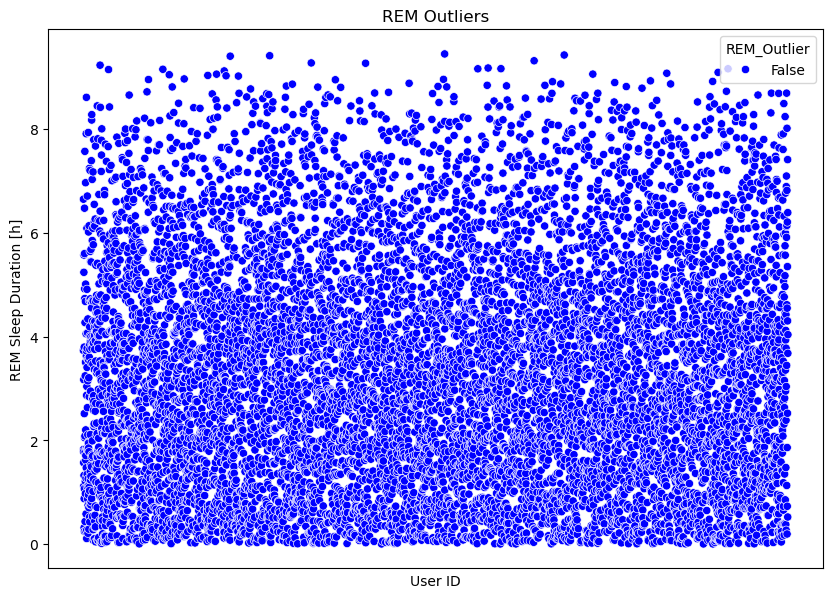

In [42]:
final_df['REM_Outlier'] = (final_df['REM_Sleep_Duration'] < lower_bound) | (final_df['REM_Sleep_Duration'] > upper_bound)


plt.figure(figsize=(10, 7))
sns.scatterplot(data=final_df, x='User_ID', y='REM_Sleep_Duration', hue='REM_Outlier', palette={True: 'red', False: 'blue'})
plt.title('REM Outliers')
plt.xlabel('User ID')
plt.ylabel('REM Sleep Duration [h]')
plt.xticks([], [])
plt.show()

Skoro są to dane syntetyczne, mozliwe, ze wyniki nie przeszly walidacji biologicznej. Jeśli chcemy to naprawic, możemy nadać filtr "biologiczny", czyli np. założyć, że jesli REM jest wiekszy niz np 2.5 h, to jest juz outliersem. 


In [43]:
unrealistic_REM = final_df[final_df['REM_Sleep_Duration'] > 2.5]
print("Incorrect REM Values ")
print(unrealistic_REM[['User_ID', 'REM_Sleep_Duration']])

Incorrect REM Values 
      User_ID  REM_Sleep_Duration
0     U_00001            3.733173
1     U_00002            6.648056
5     U_00006            3.168435
7     U_00008            5.238043
8     U_00009            5.571315
...       ...                 ...
9994  U_09995            4.301681
9995  U_09996            7.411076
9997  U_09998            6.388913
9998  U_09999            3.676573
9999  U_10000            4.036327

[5854 rows x 2 columns]


Duzo, chyba bez sensu usuwac.


SKIN TEMPERATURE

Skin_Temperature: 30°C do 40°C (normalny zakres temperatury skóry).

ANOMALY FLAG

Anomaly_Flag
• Description: A binary flag indicating any anomaly in the data.


 Values: 0 (No anomaly), 1 (Anomaly detected)
 
• Represents: Data integrity or potential issues in metrics recording.

In [44]:
print(final_df['Anomaly_Flag'].value_counts())

Anomaly_Flag
1    6228
0    3772
Name: count, dtype: int64


In [45]:
print(final_df['Anomaly_Flag'].value_counts(normalize=True) * 100)


Anomaly_Flag
1    62.28
0    37.72
Name: proportion, dtype: float64


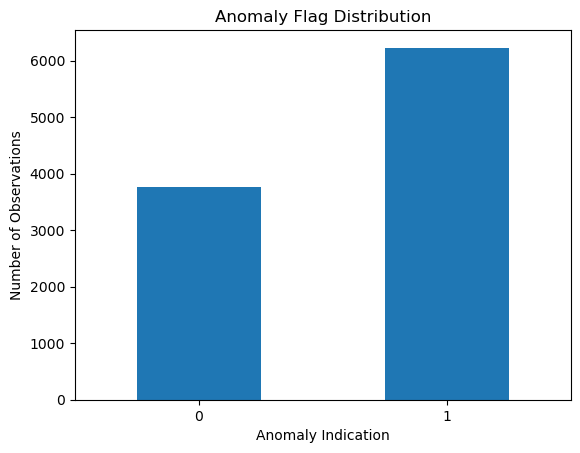

In [46]:
final_df['Anomaly_Flag'].value_counts().sort_index().plot(kind='bar')
plt.title('Anomaly Flag Distribution')
plt.xlabel('Anomaly Indication')
plt.ylabel('Number of Observations')

plt.xticks(ticks=range(final_df['Anomaly_Flag'].nunique()), labels=final_df['Anomaly_Flag'].value_counts().sort_index().index,
rotation=0)

plt.show()

In [47]:
numeric_cols = final_df.select_dtypes(include=['number'])
grouped_describe = numeric_cols.groupby(final_df['Anomaly_Flag']).describe()
grouped_df = grouped_describe.reset_index()
print(grouped_df)

  Anomaly_Flag     Age                                                      \
                 count       mean        std   min   25%   50%   75%   max   
0            0  3772.0  47.740456  21.847662  10.0  29.0  48.0  67.0  85.0   
1            1  6228.0  47.409762  21.920679  10.0  28.0  47.0  67.0  85.0   

   Weight                                                                     \
    count       mean        std        min        25%        50%         75%   
0  3772.0  90.396103  34.938879  30.024369  60.791443  89.671612  120.648181   
1  6228.0  90.356176  34.918736  30.001125  59.938627  90.043968  120.623013   

               Height                                                 \
          max   count        mean        std         min         25%   
0  150.921705  3772.0  170.311462  17.700950  140.001252  155.192661   
1  150.978482  6228.0  170.677475  17.538211  140.015129  155.577595   

                                      Sleep_Duration                      \
 

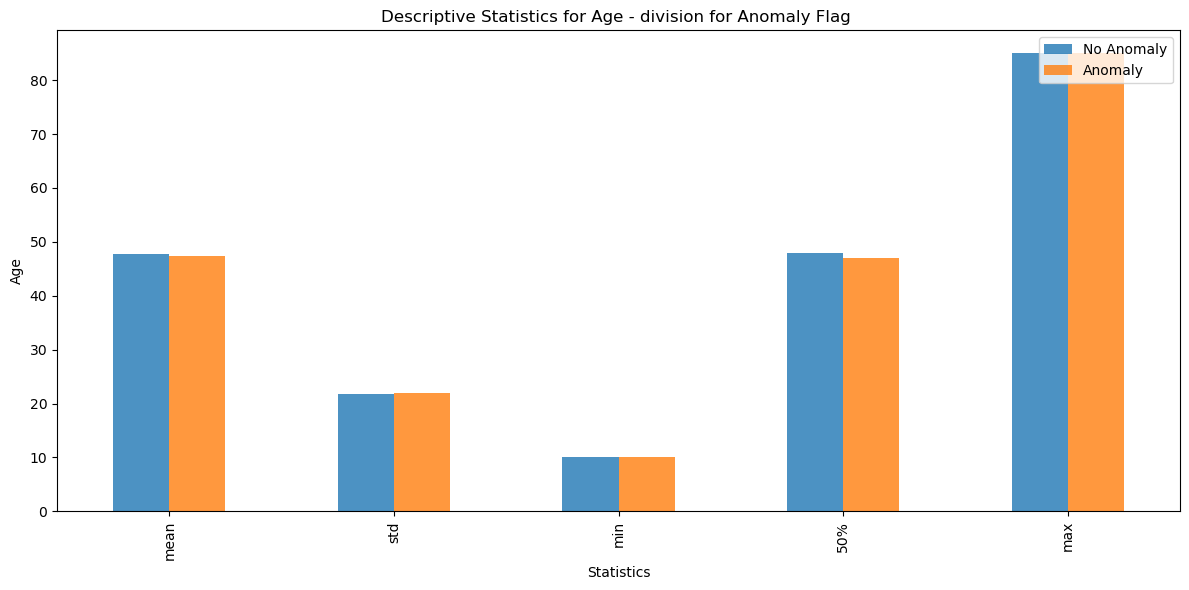

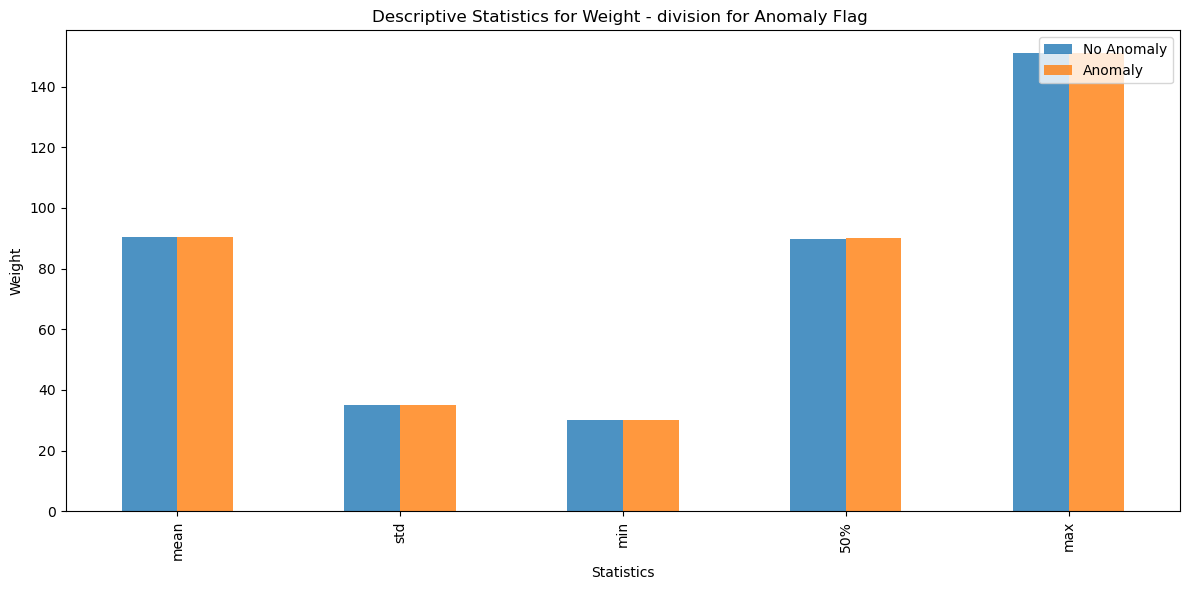

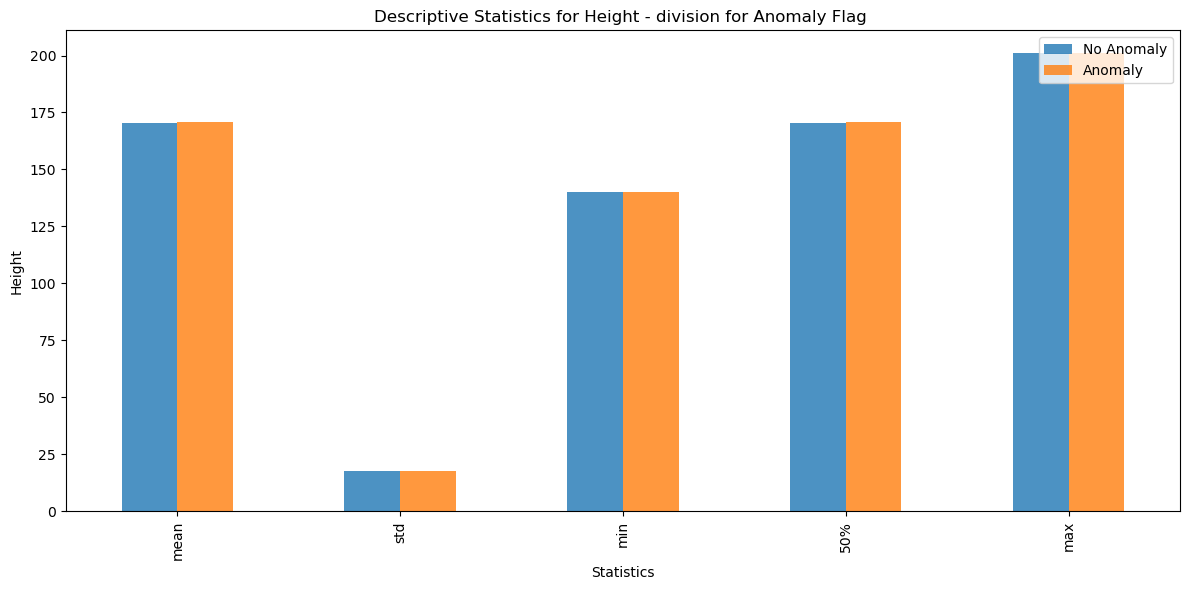

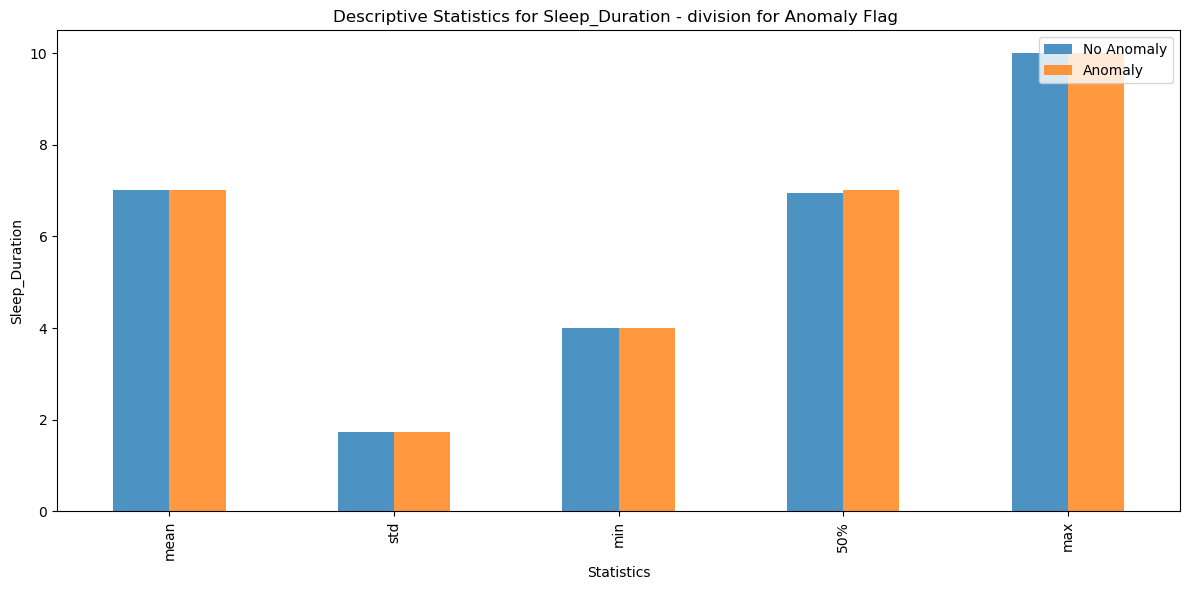

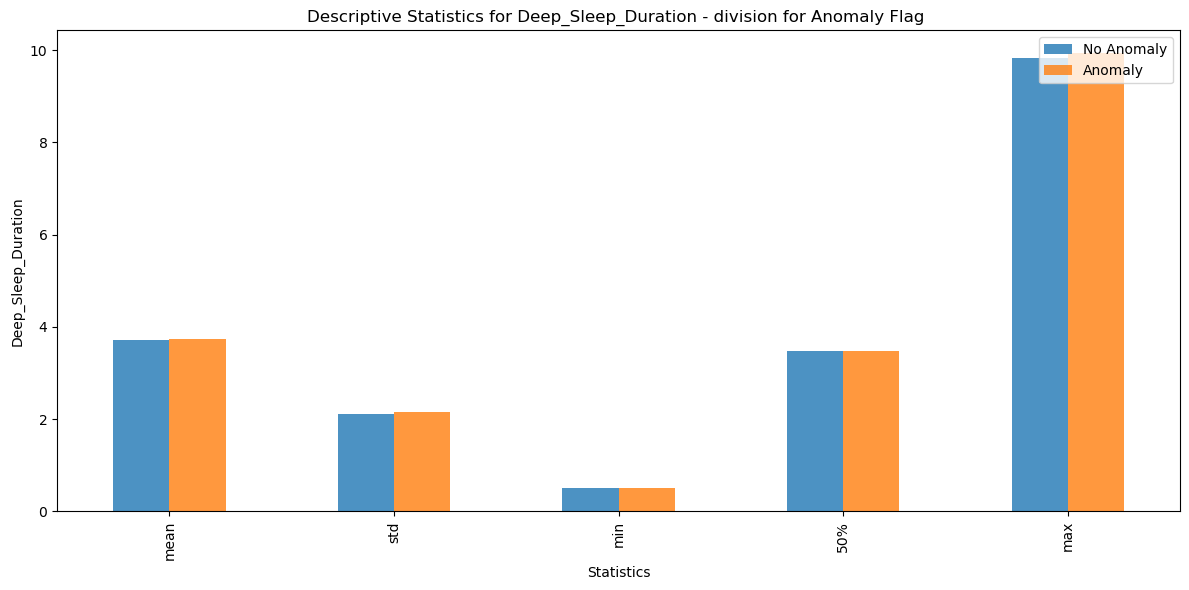

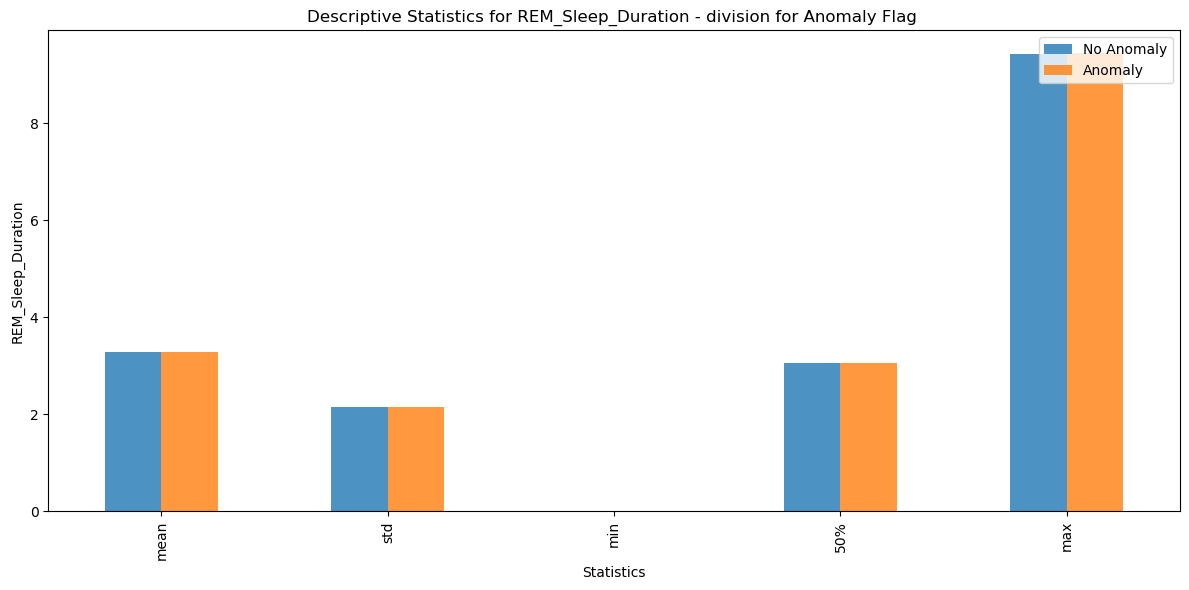

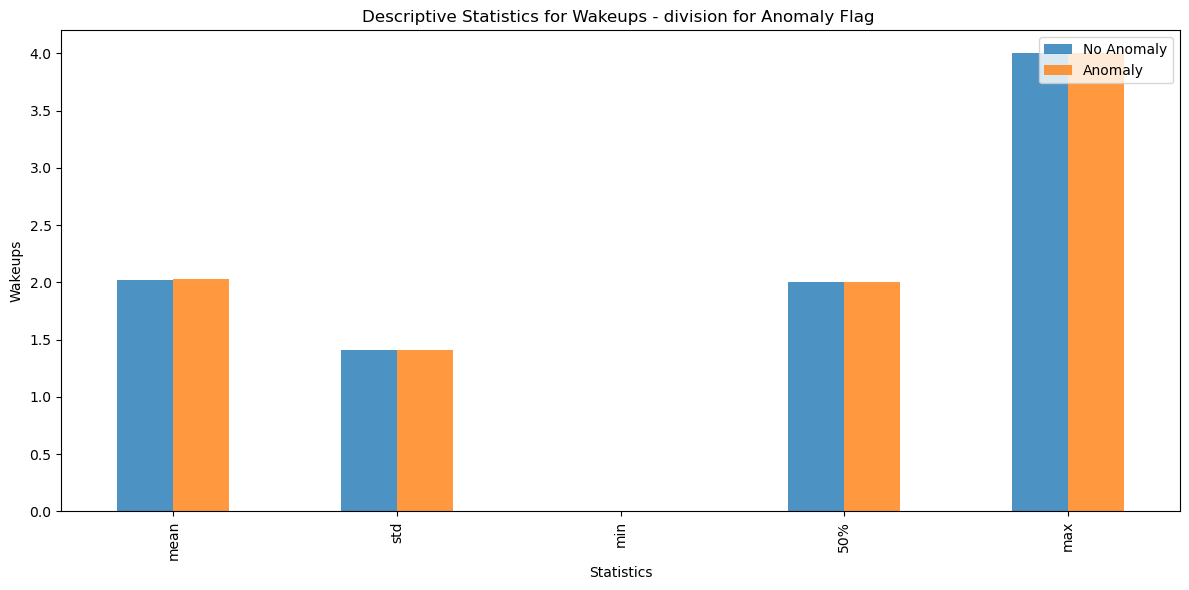

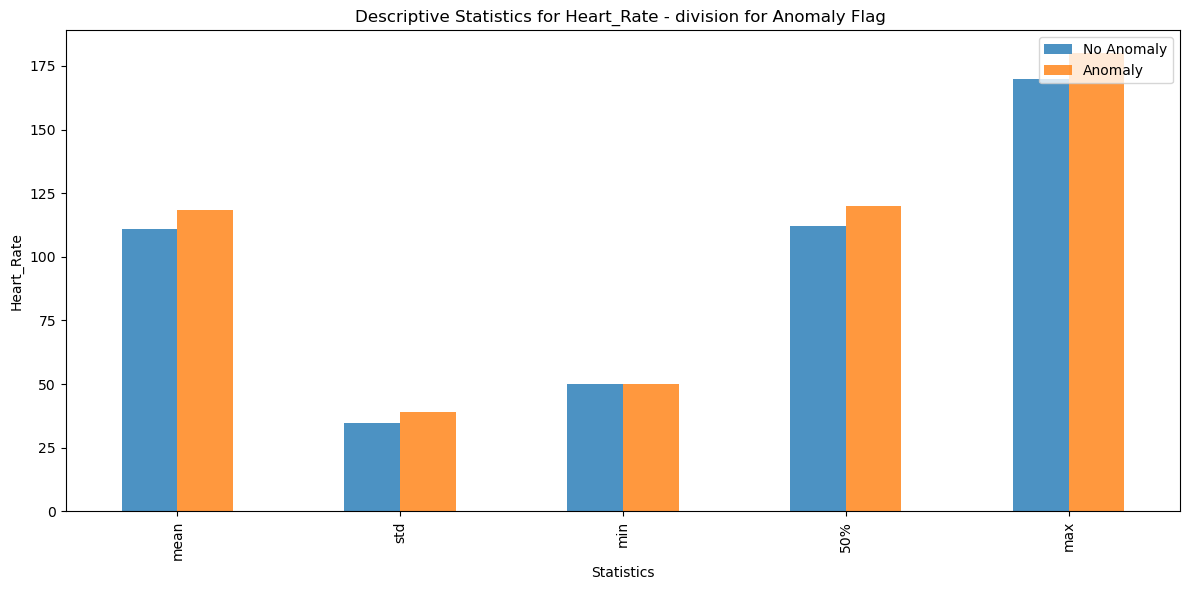

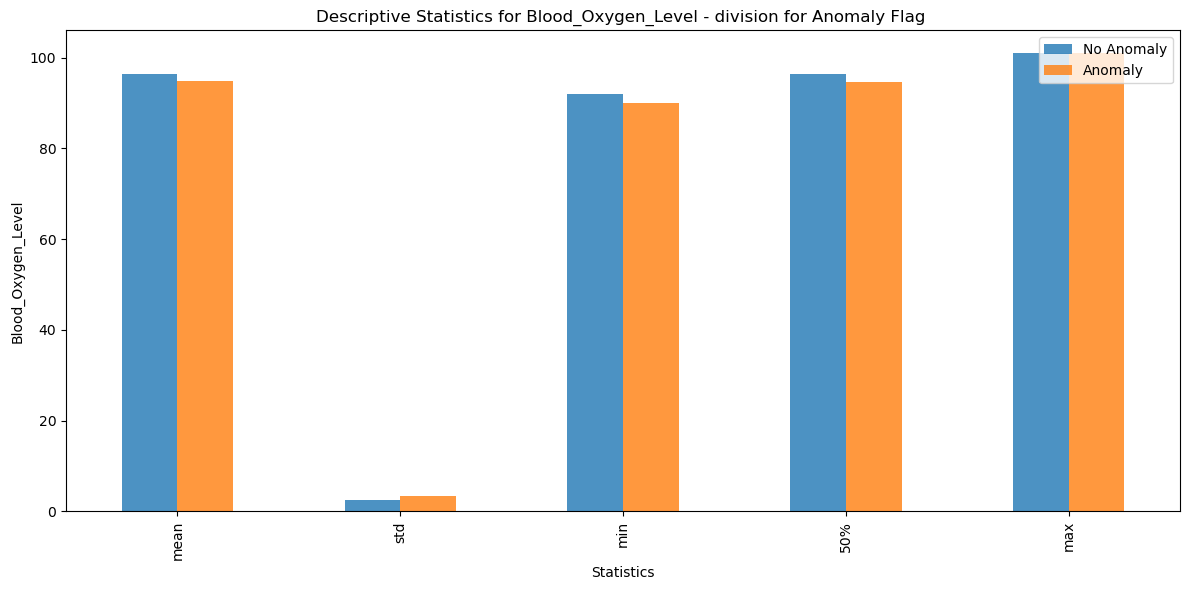

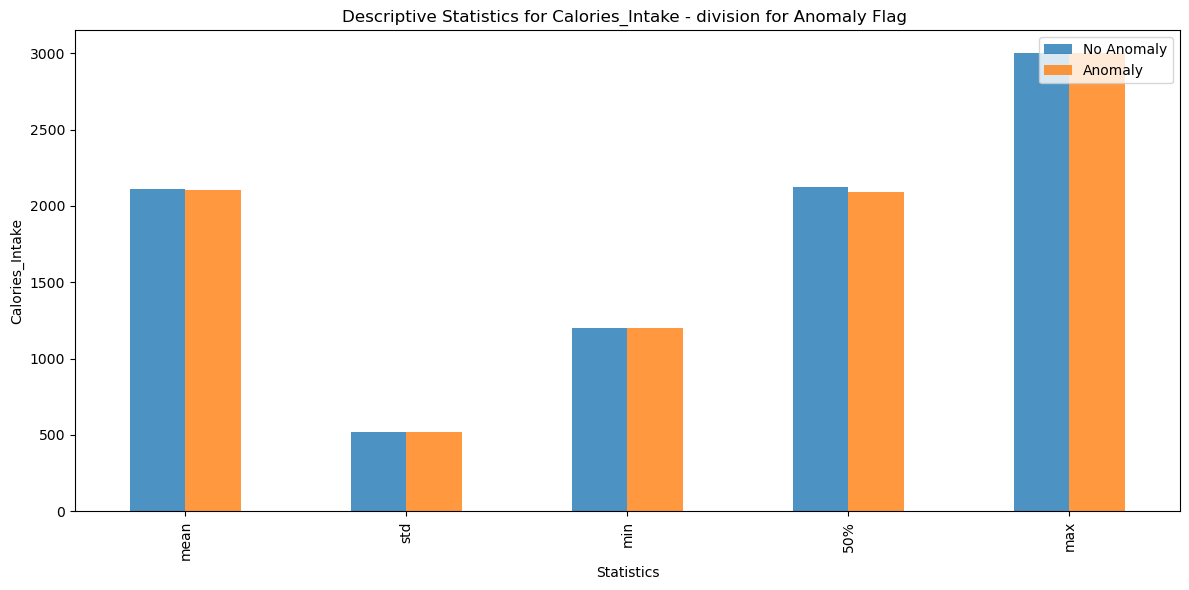

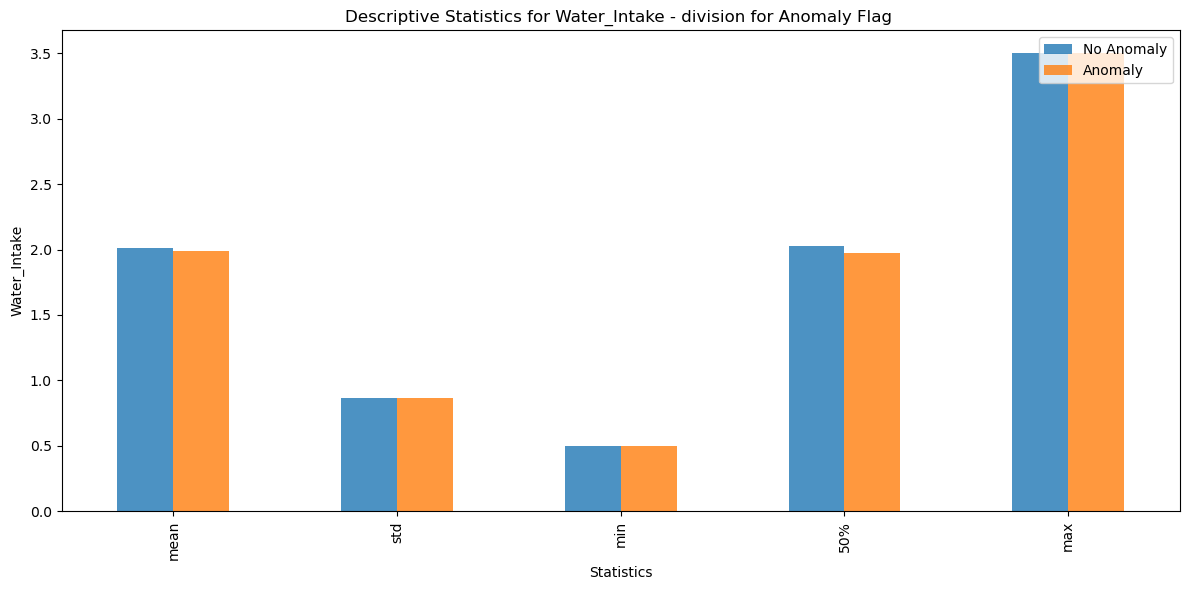

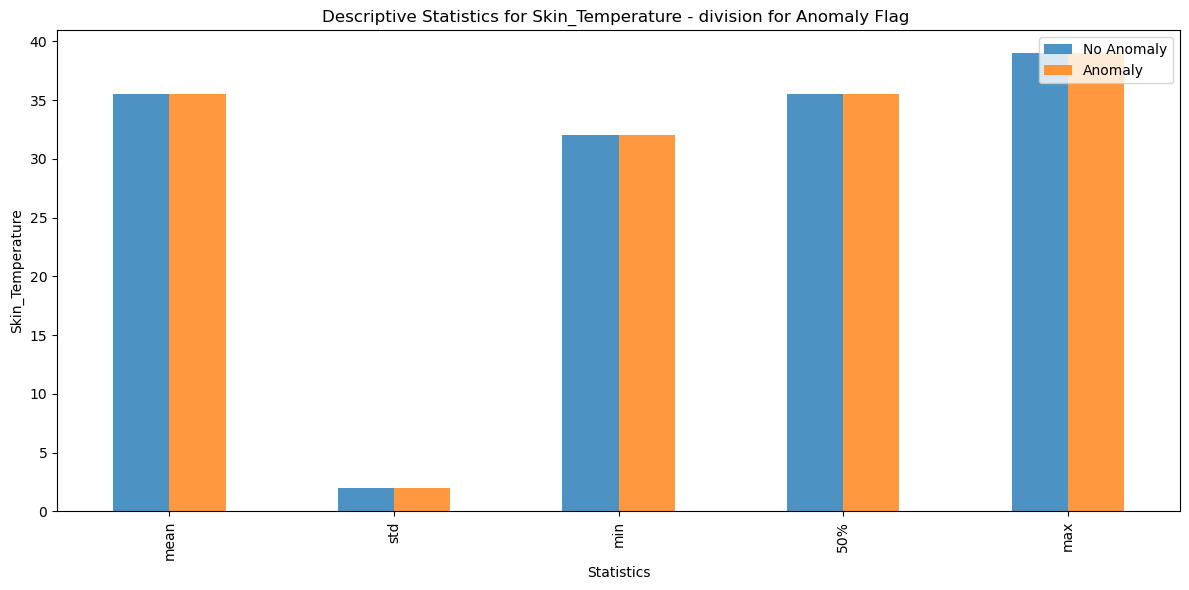

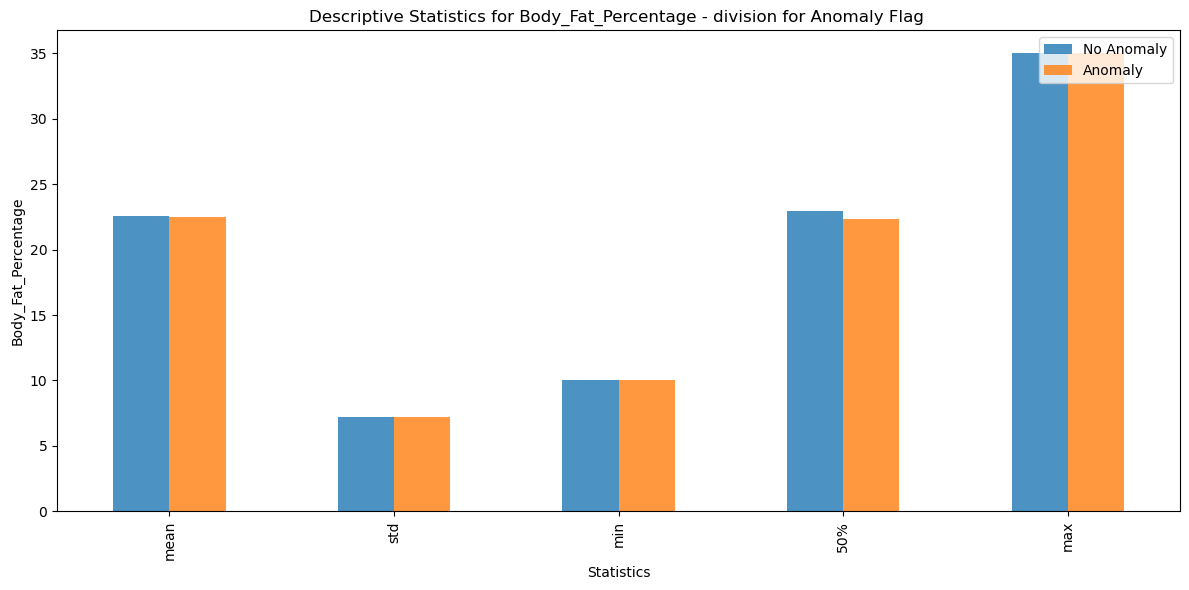

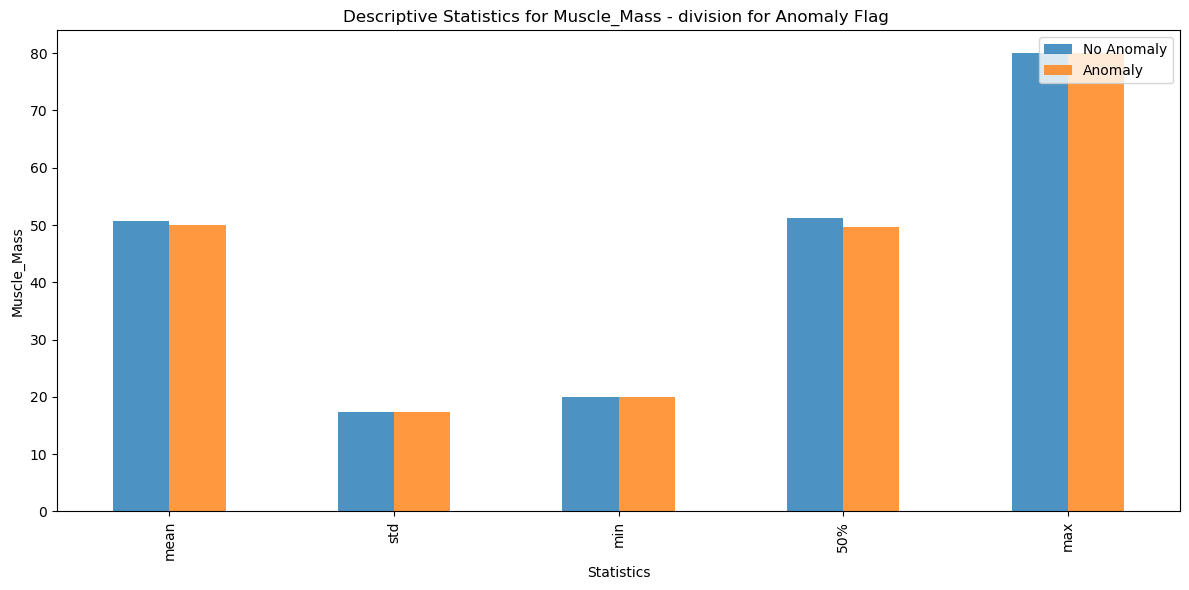

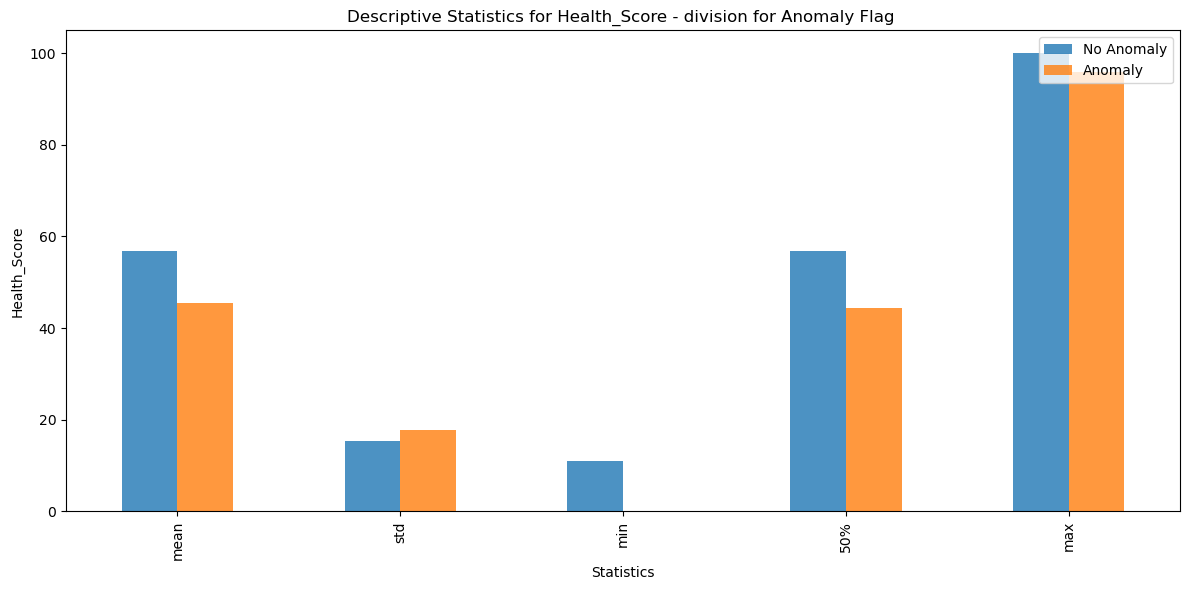

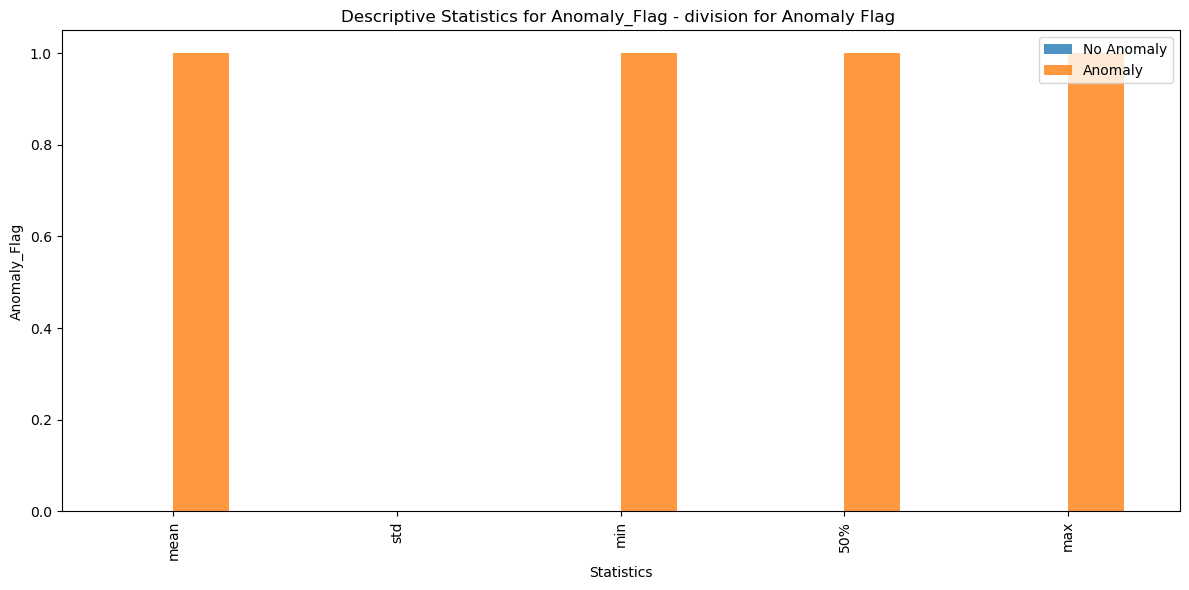

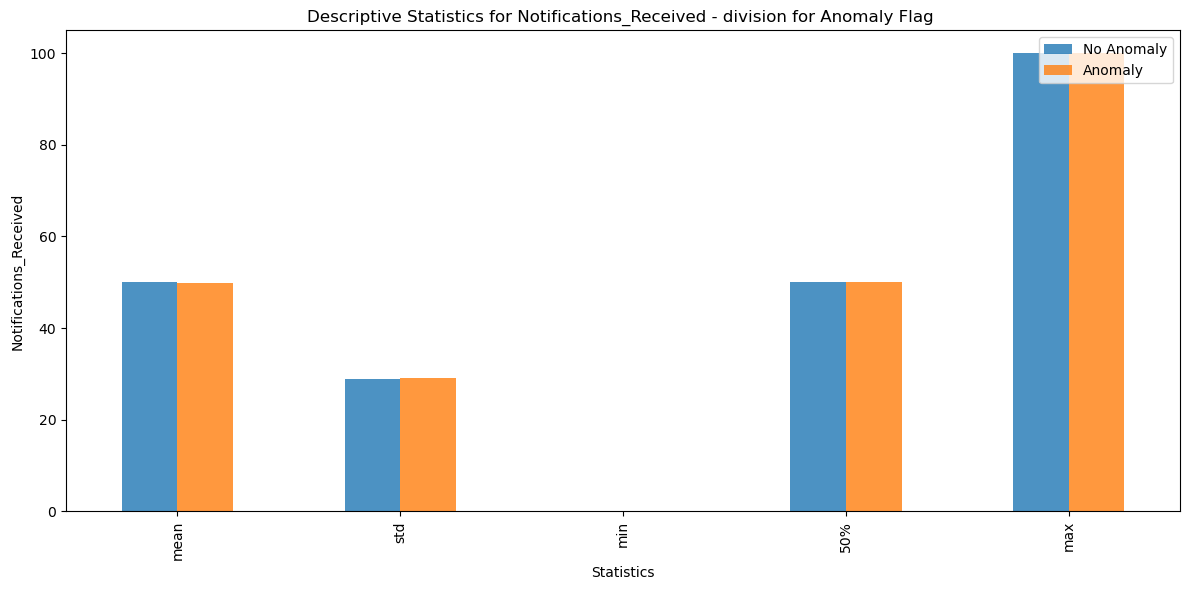

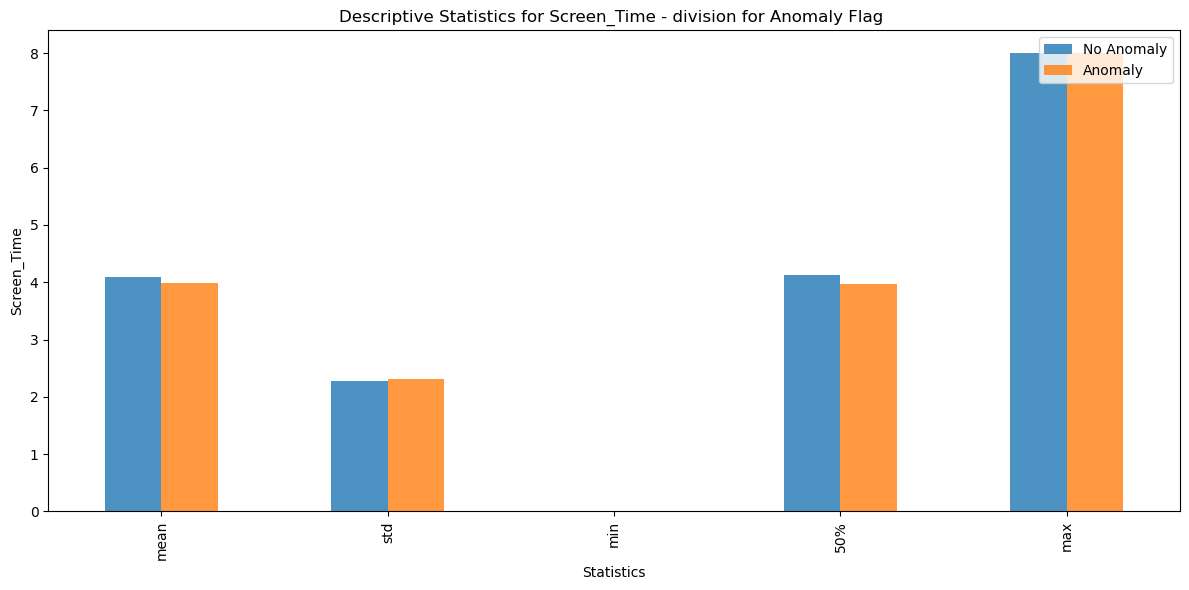

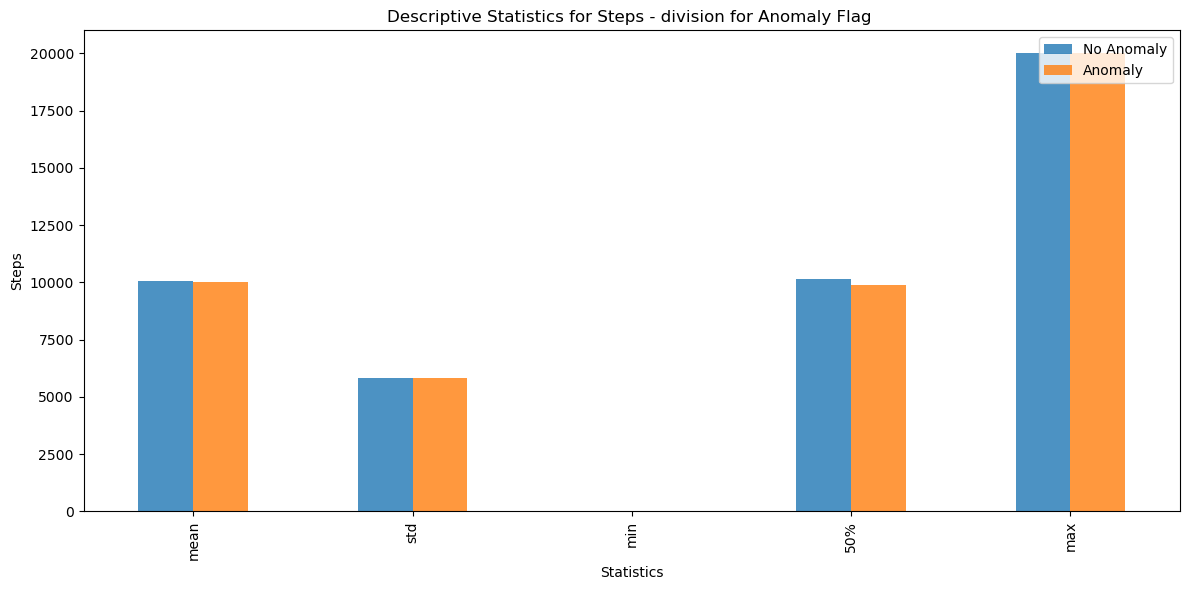

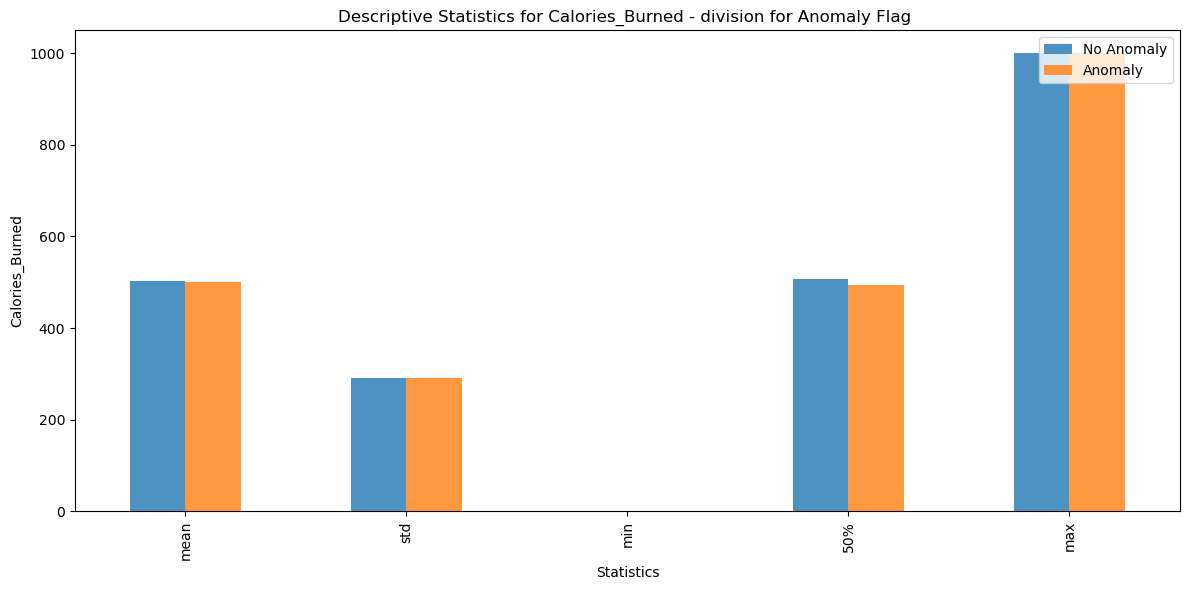

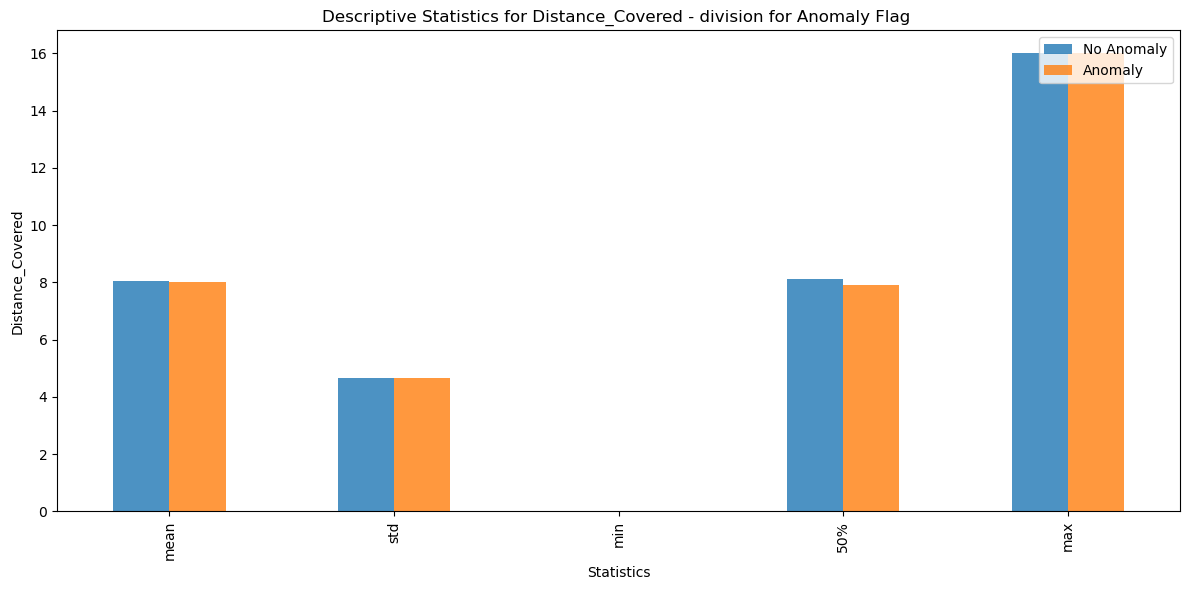

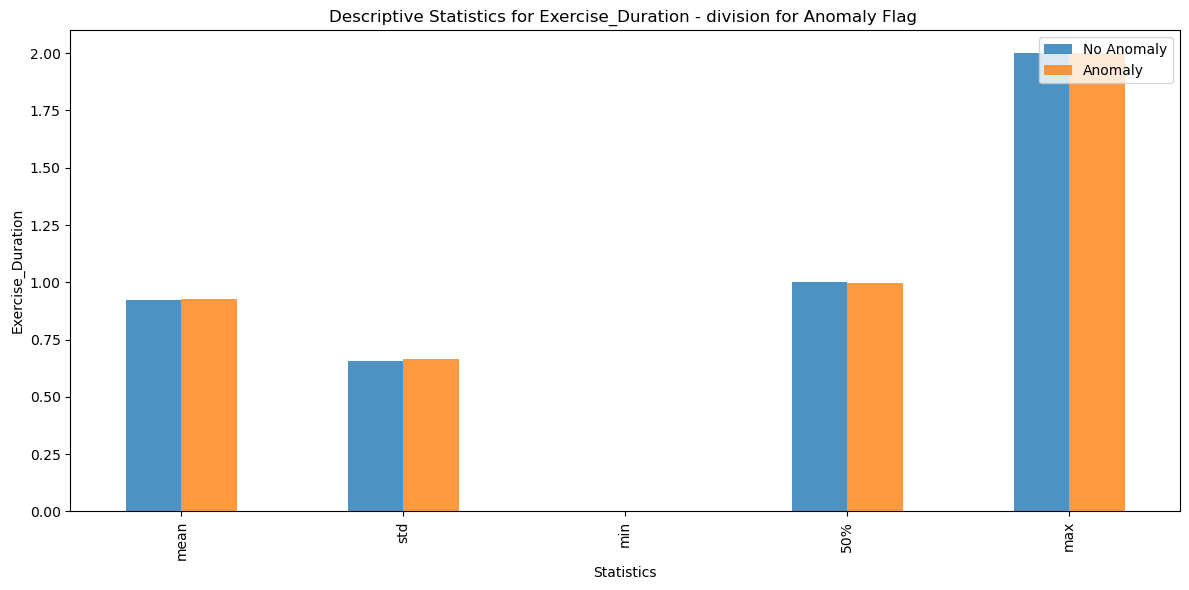

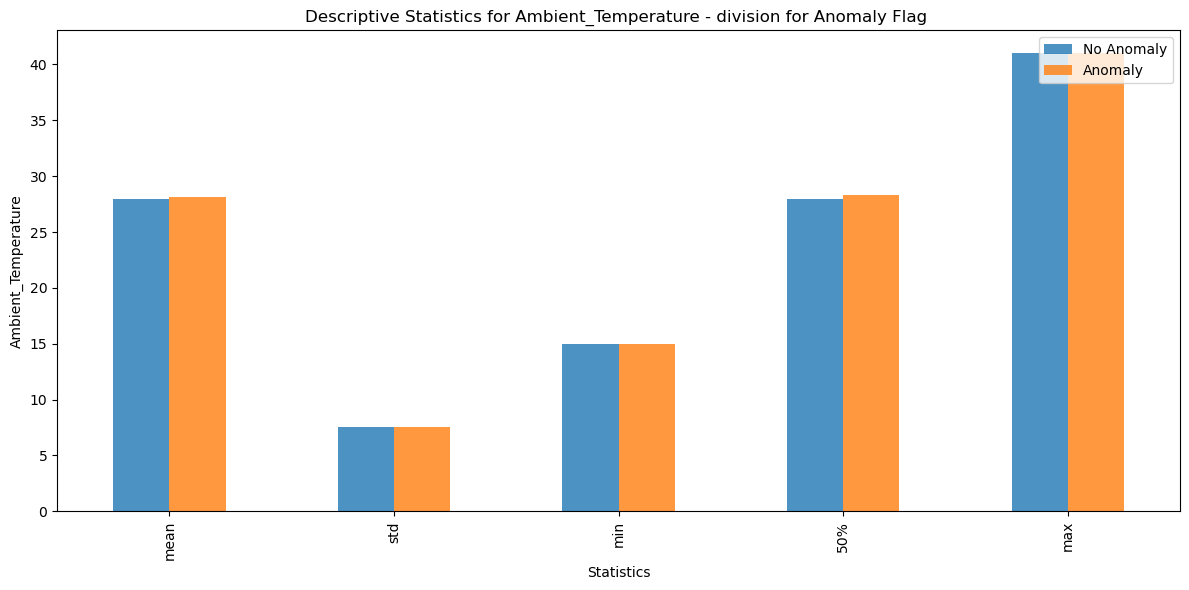

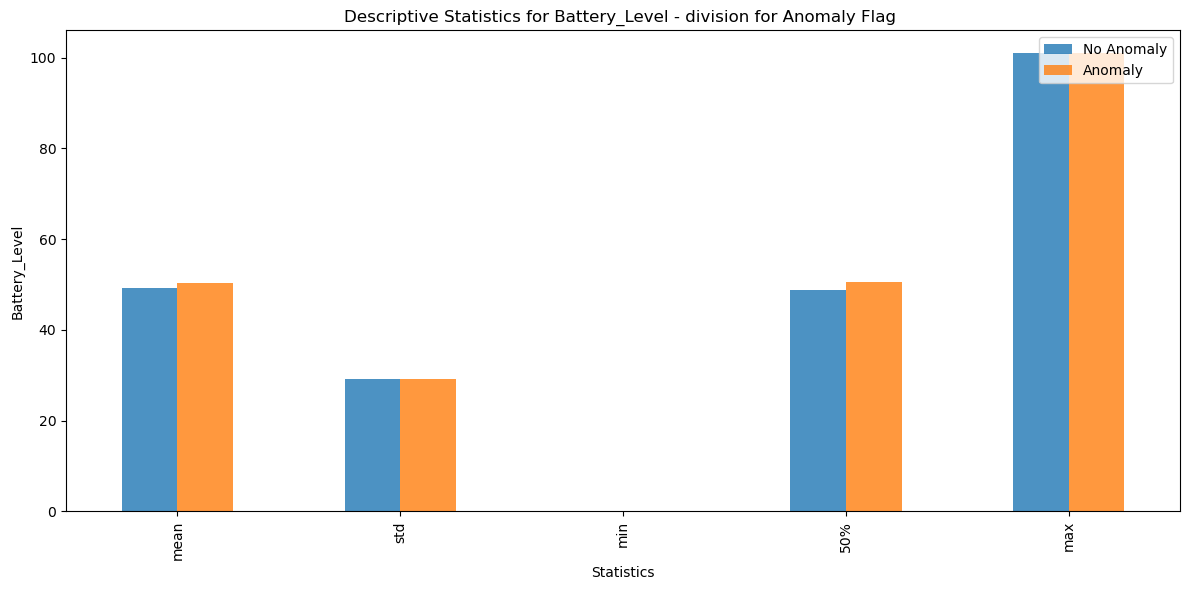

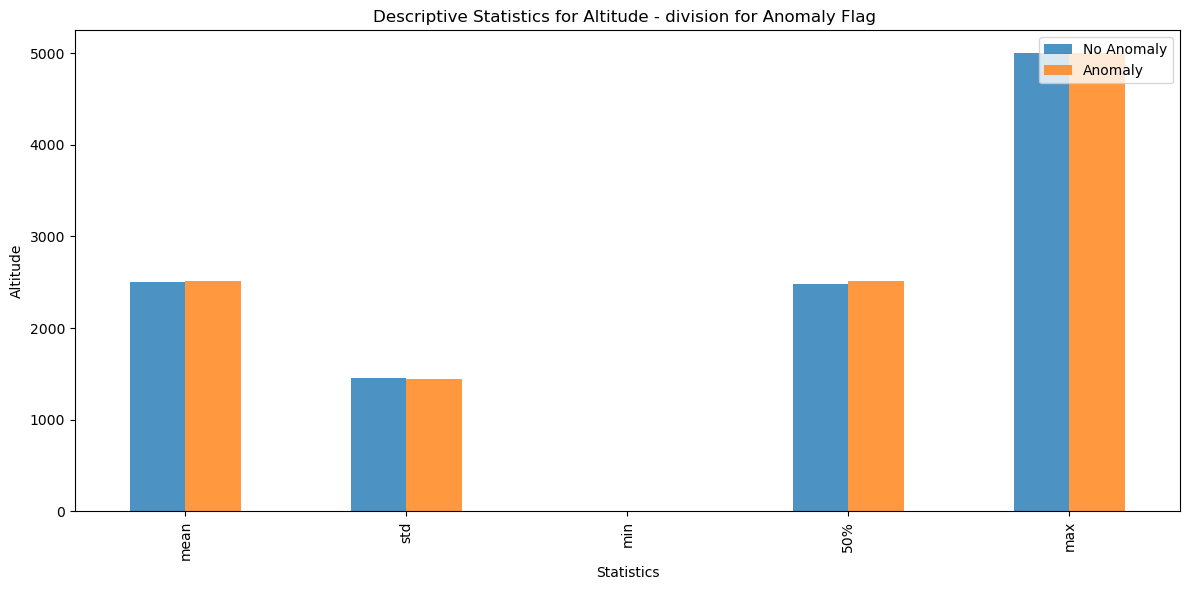

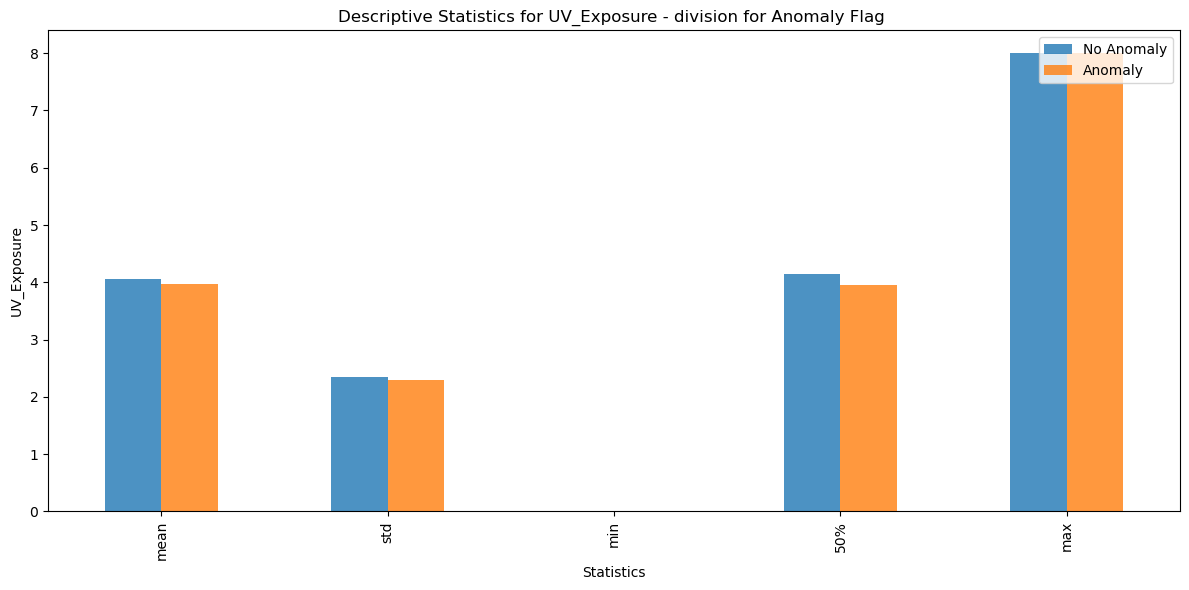

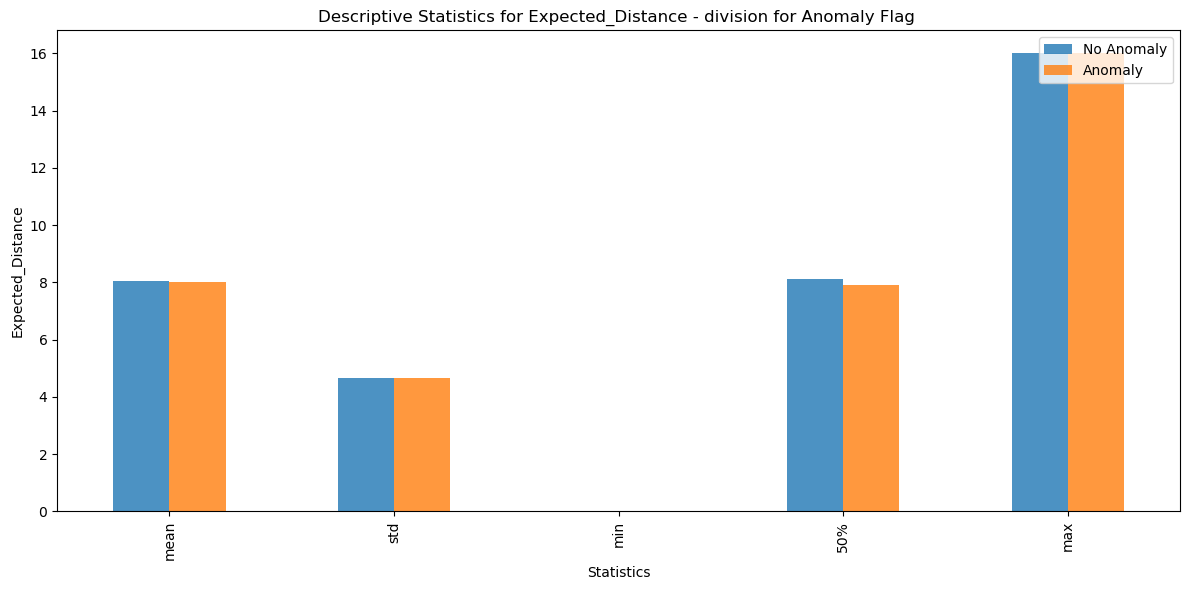

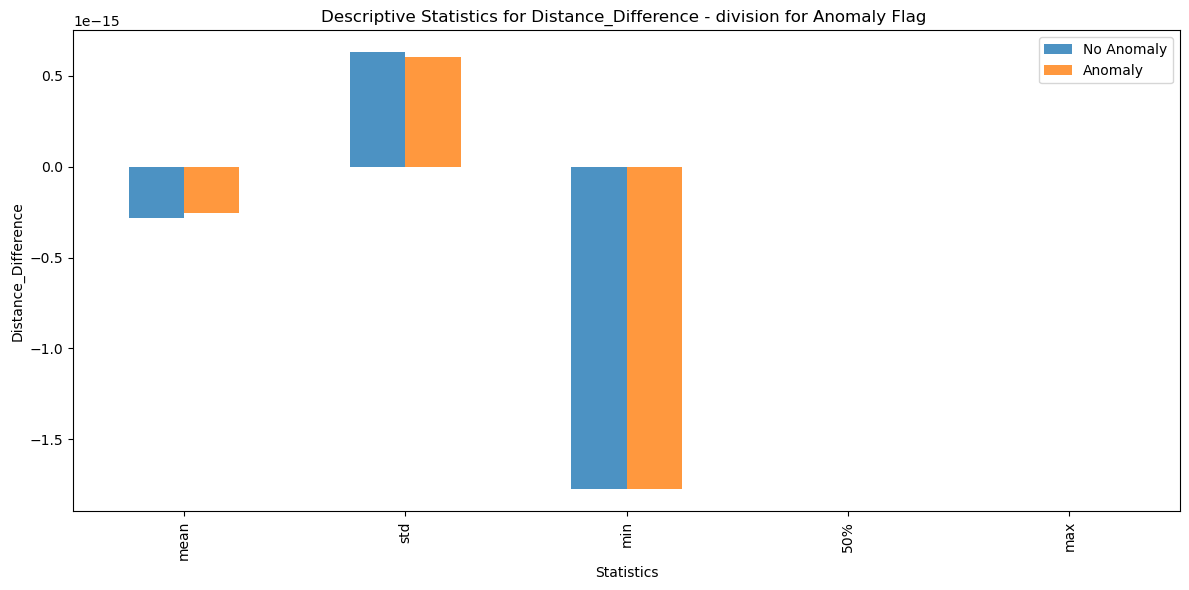

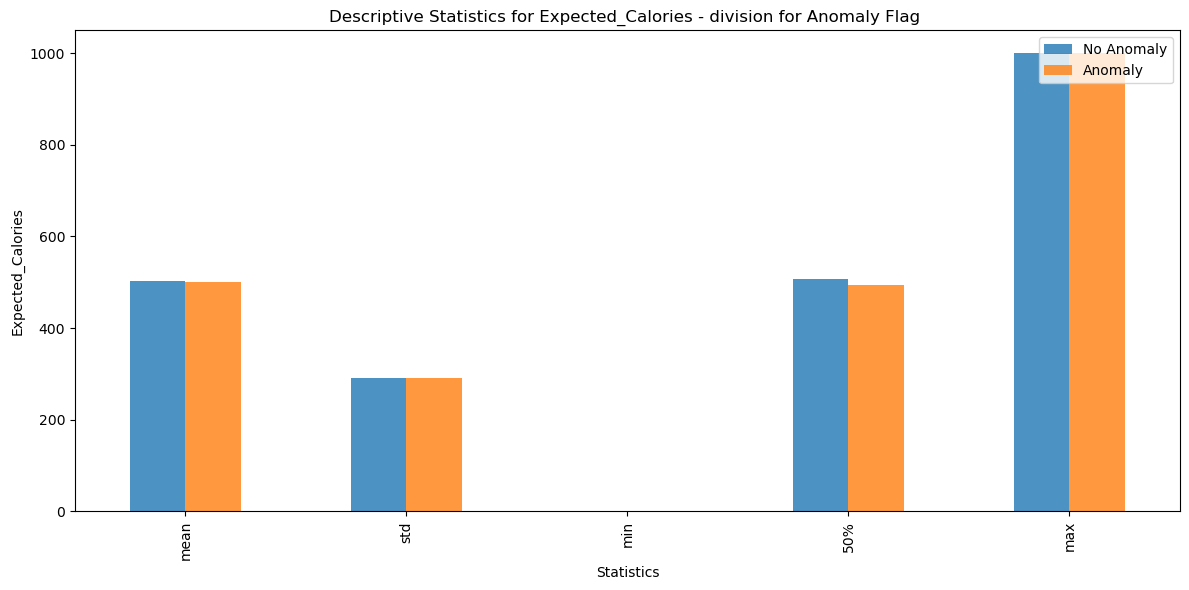

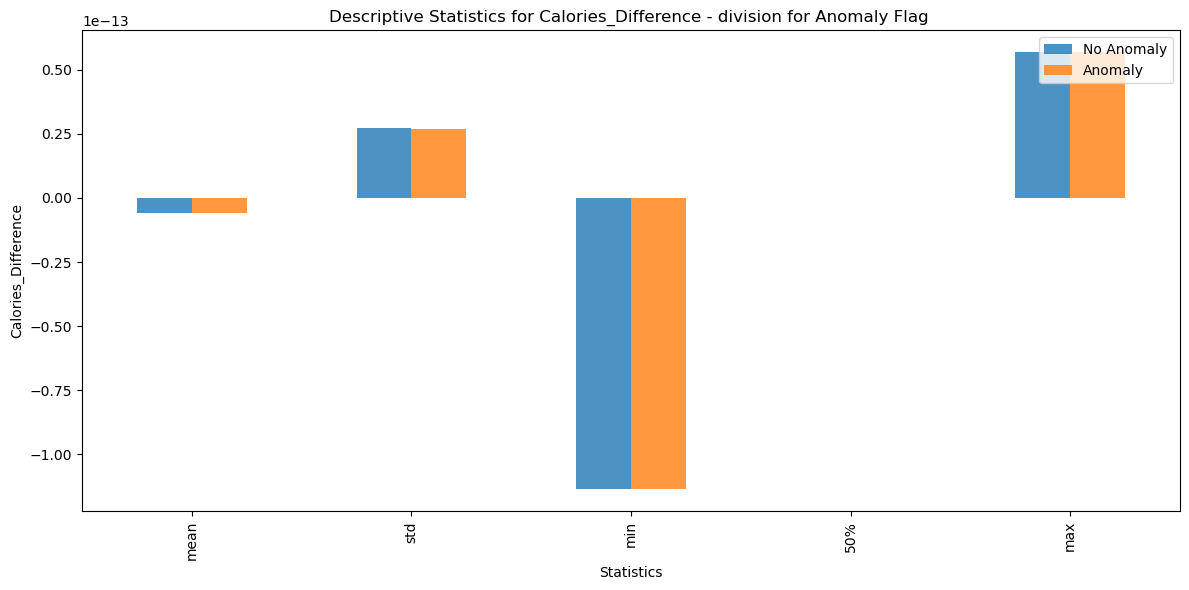

In [54]:
for col in numeric_cols:
    stats = final_df.groupby('Anomaly_Flag')[col].describe()

    stats[['mean', 'std', 'min', '50%', 'max']].T.plot(kind='bar', figsize=(12, 6), alpha=0.8)
    plt.title(f'Descriptive Statistics for {col} - division for Anomaly Flag ')
    plt.xlabel('Statistics')
    plt.ylabel(col)
    plt.legend(['No Anomaly', 'Anomaly'], loc='upper right')
    plt.tight_layout()
    plt.show()

Wszystko podobne.

In [55]:
if final_df['Anomaly_Flag'].dtype != 'int' and final_df['Anomaly_Flag'].dtype != 'float':
    final_df['Anomaly_Flag'] = final_df['Anomaly_Flag'].astype(int)

numeric_cols = final_df.select_dtypes(include=['number'])

correlations = numeric_cols.corr()['Anomaly_Flag'].sort_values(ascending=False)
print(correlations)

Anomaly_Flag              1.000000
Heart_Rate                0.093884
Distance_Difference       0.019841
Battery_Level             0.017600
Ambient_Temperature       0.011793
Height                    0.010080
Skin_Temperature          0.005825
Altitude                  0.005359
Deep_Sleep_Duration       0.003909
Wakeups                   0.003181
Sleep_Duration            0.003178
Exercise_Duration         0.002246
Calories_Difference       0.001432
Weight                   -0.000554
Notifications_Received   -0.001298
REM_Sleep_Duration       -0.001306
Calories_Burned          -0.003910
Expected_Calories        -0.003910
Steps                    -0.003910
Distance_Covered         -0.003910
Expected_Distance        -0.003910
Age                      -0.007322
Calories_Intake          -0.007762
Body_Fat_Percentage      -0.009343
Water_Intake             -0.012618
UV_Exposure              -0.018739
Muscle_Mass              -0.019316
Screen_Time              -0.019829
Blood_Oxygen_Level  

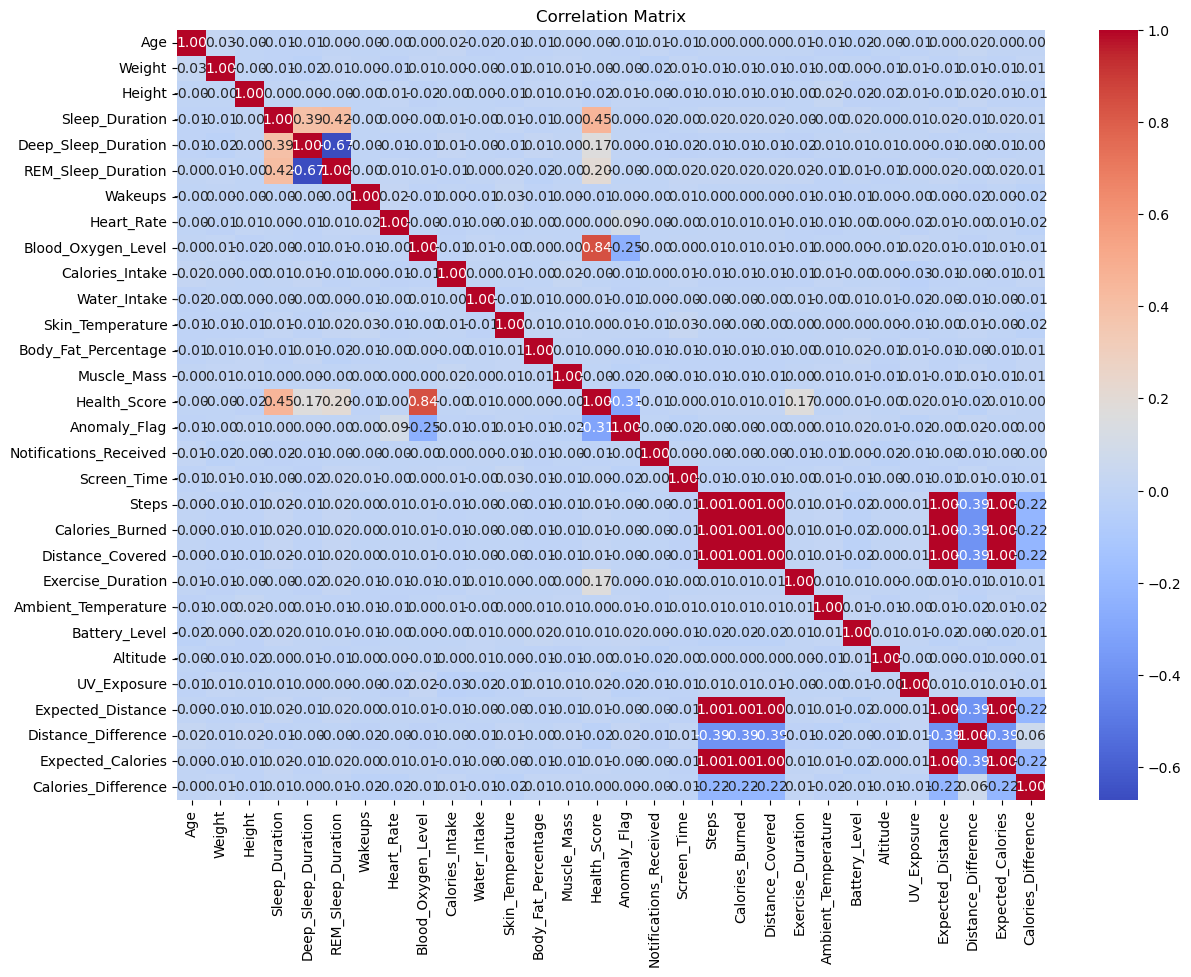

In [57]:
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Anomalie- ujemna korelacja z Blood Oxygen i z Health Score. Im niższy Health Score, tym większa szansa na wystąpienie anomalii. Ujemna korelacja oznacza, że niższe poziomy tlenu we krwi mogą być związane z występowaniem anomalii.

Sprawdzanie innych odstajacych wartosci numerycznych przez obliczenie zakresu miedzykwartylowego. 

In [23]:
print(numeric_cols)

      Age      Weight      Height  Sleep_Duration  Deep_Sleep_Duration  \
0      61   88.677623  178.524231        6.518206             2.785033   
1      24   86.742084  200.346358        7.522446             0.874391   
2      81   61.656054  195.971356        8.583386             6.760476   
3      70  141.513794  164.178216        4.425767             2.645596   
4      30   80.552872  146.920675        6.008918             4.440672   
...   ...         ...         ...             ...                  ...   
9995   16  143.301741  152.822616        8.328084             0.917008   
9996   46   89.447004  168.085894        5.355088             4.834921   
9997   62   43.284274  200.536394        9.016752             2.627839   
9998   27   86.436494  162.125426        4.465159             0.788586   
9999   47   97.284937  179.853153        7.487307             3.450980   

      REM_Sleep_Duration  Wakeups  Heart_Rate  Blood_Oxygen_Level  \
0               3.733173        4         

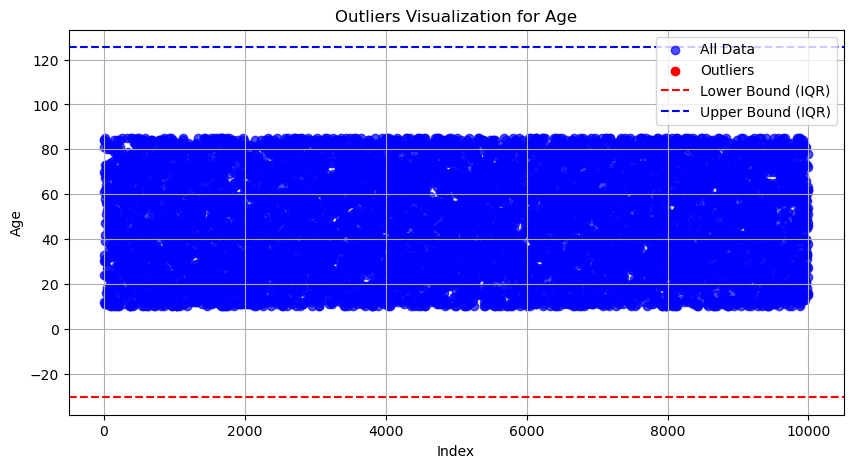

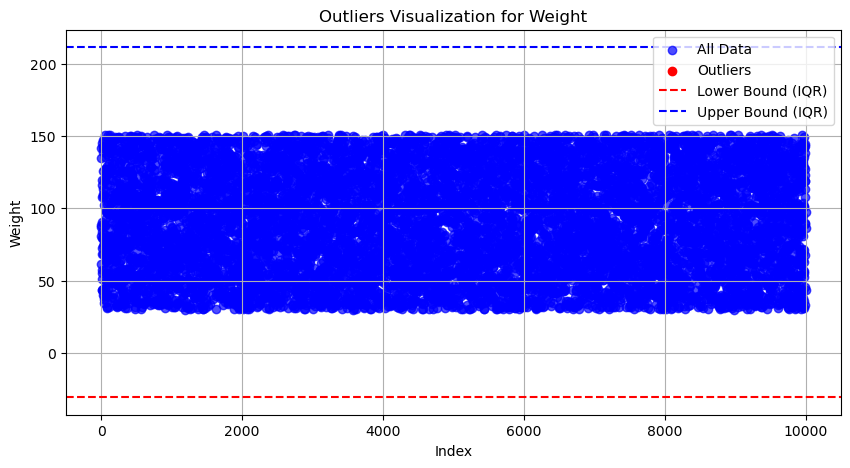

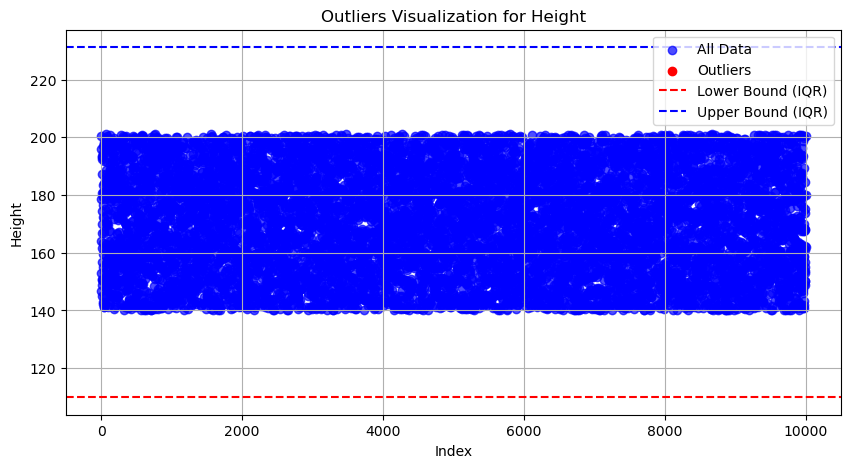

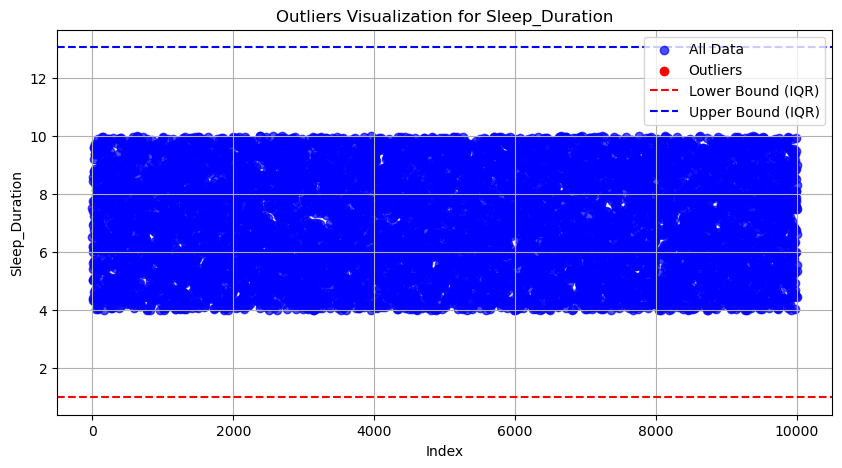

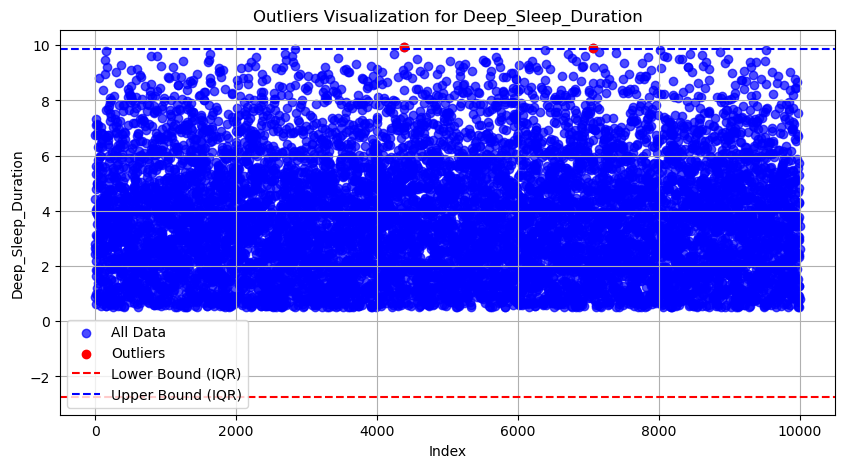

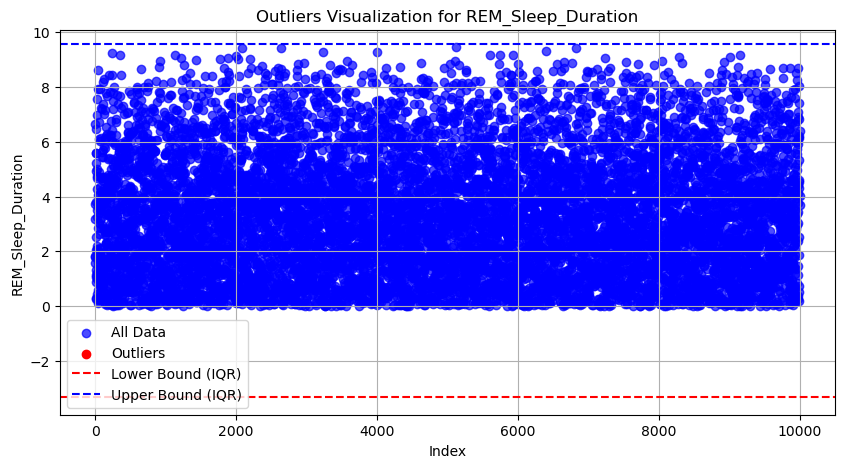

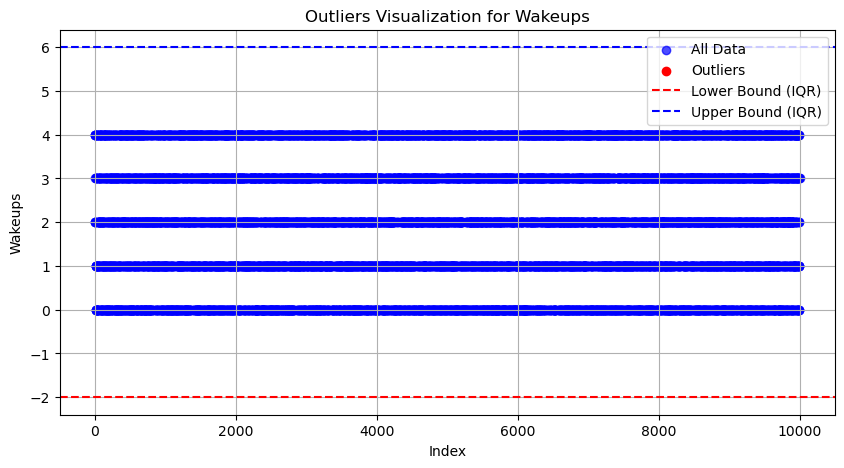

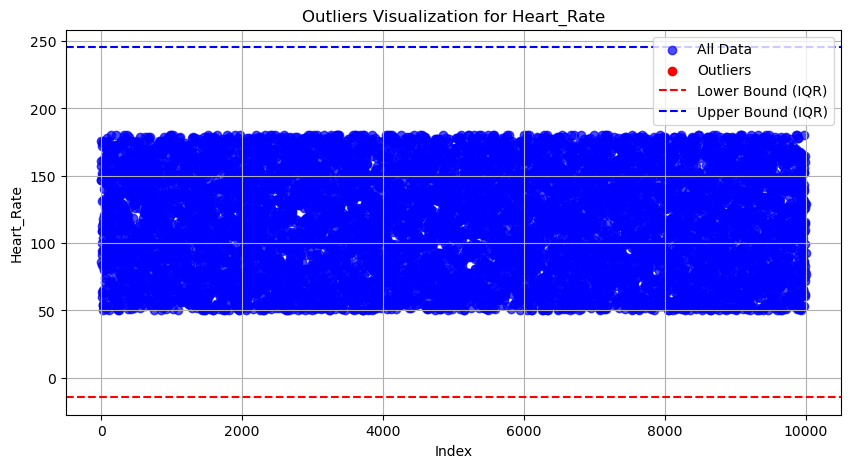

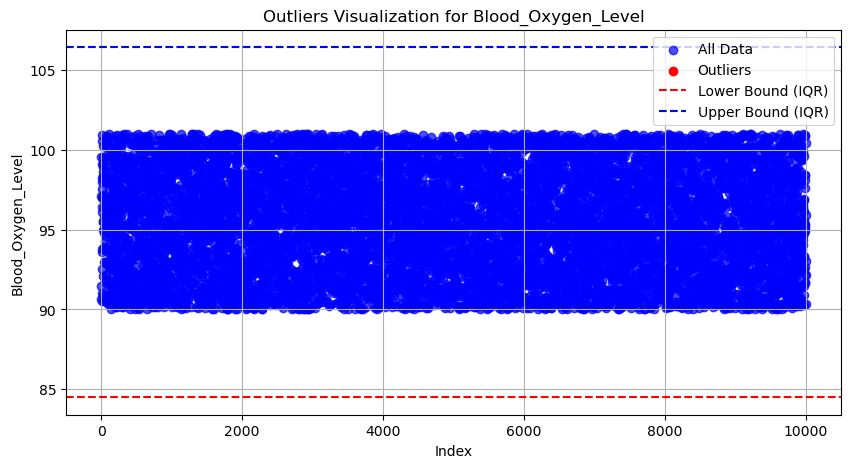

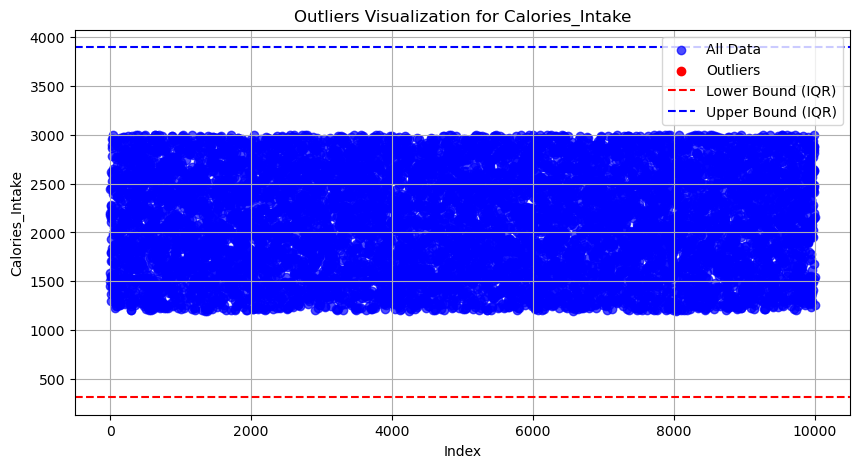

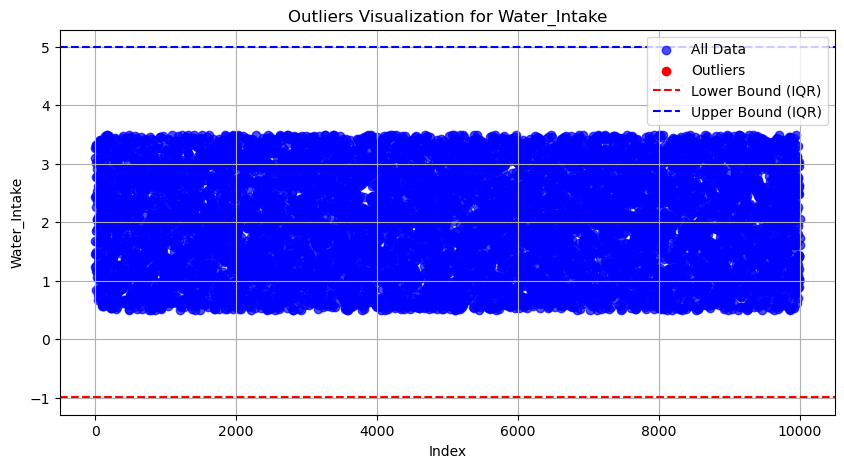

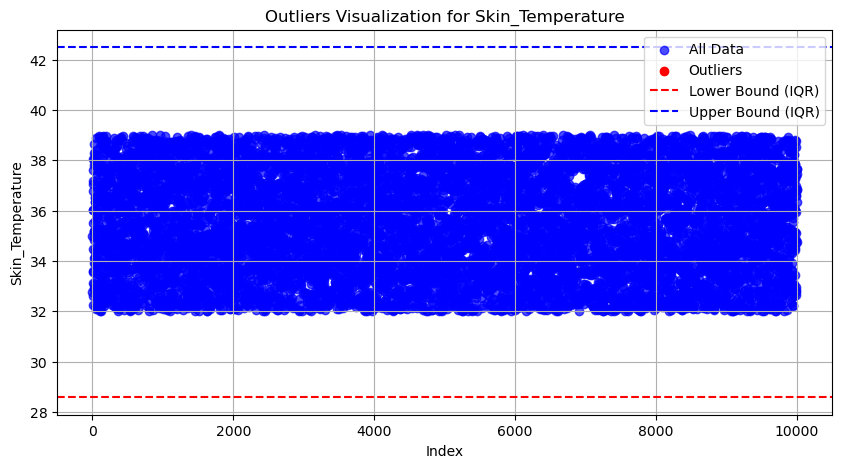

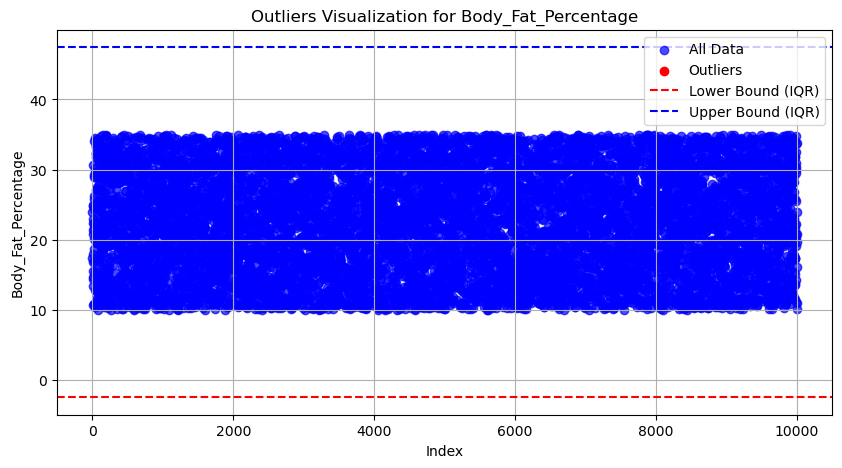

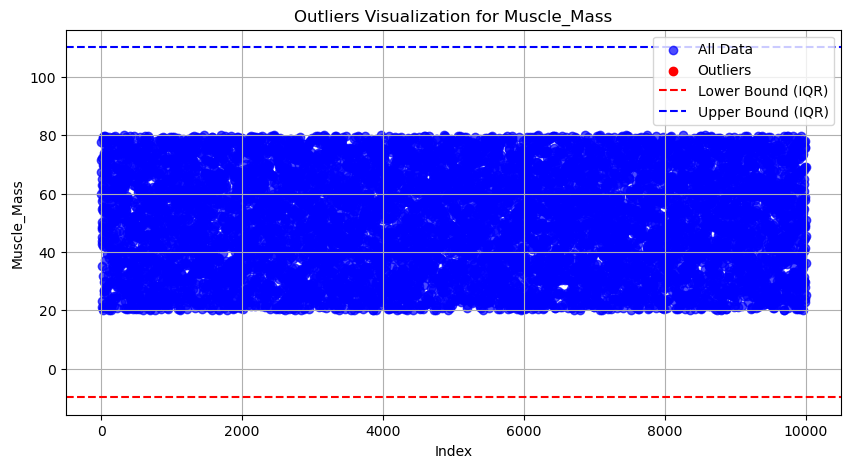

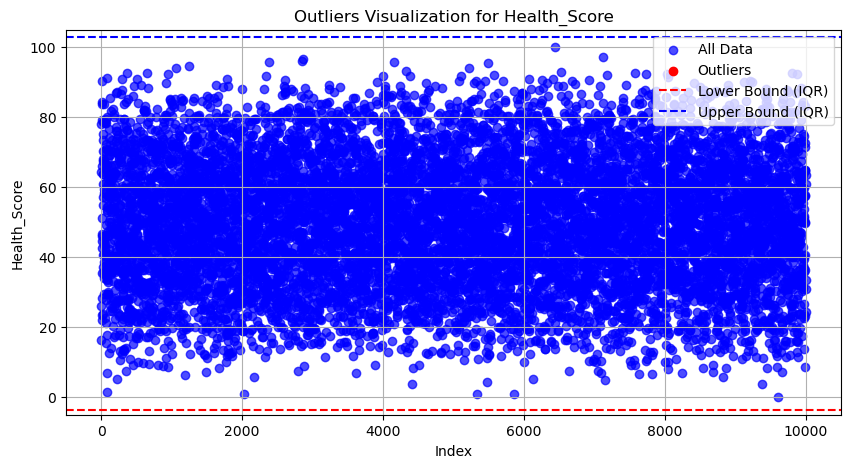

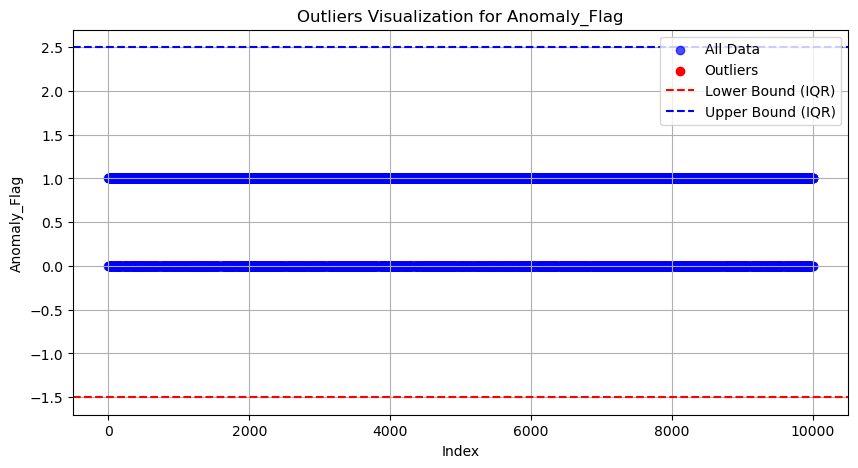

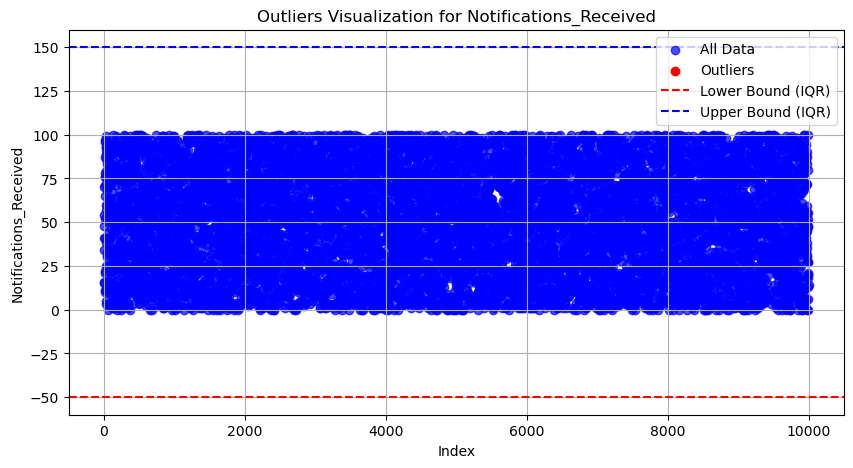

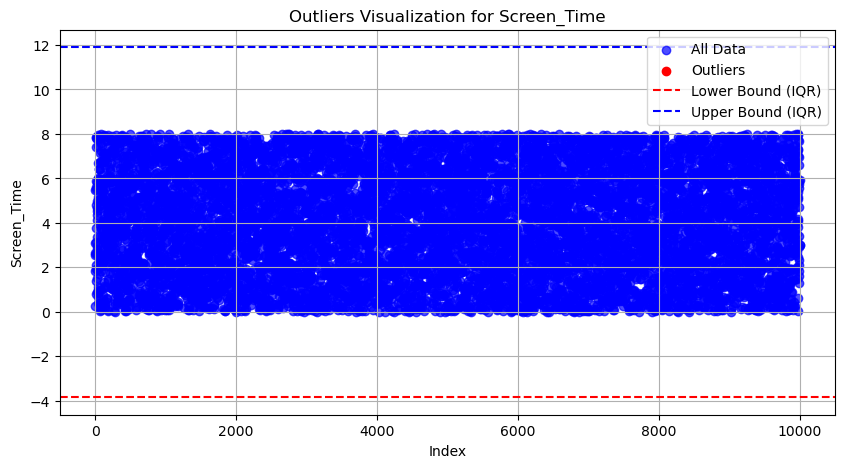

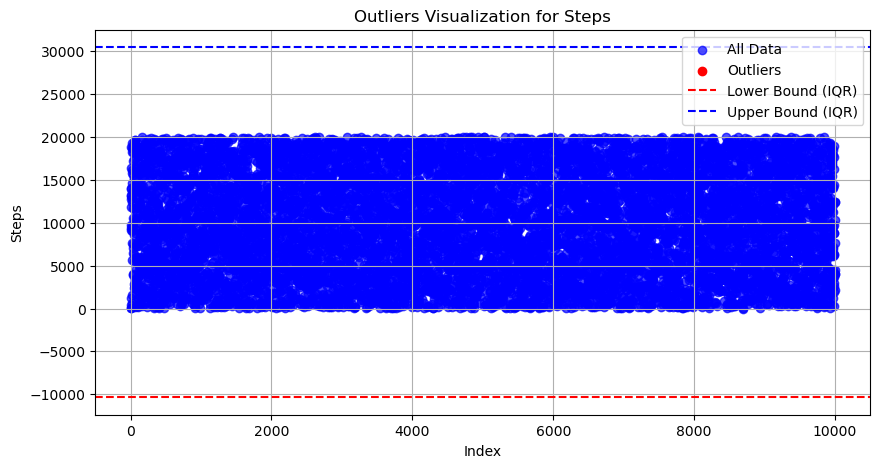

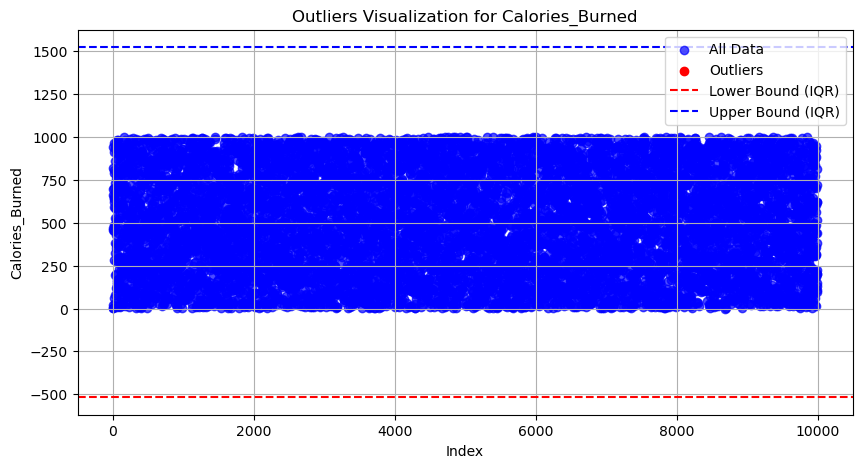

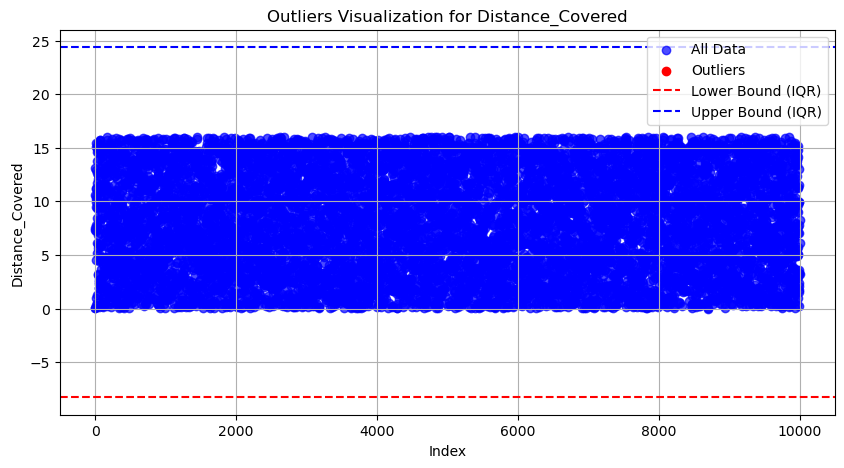

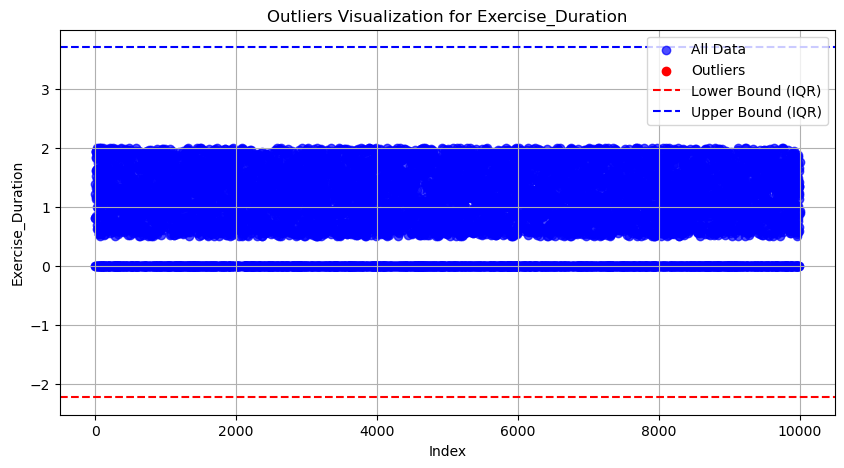

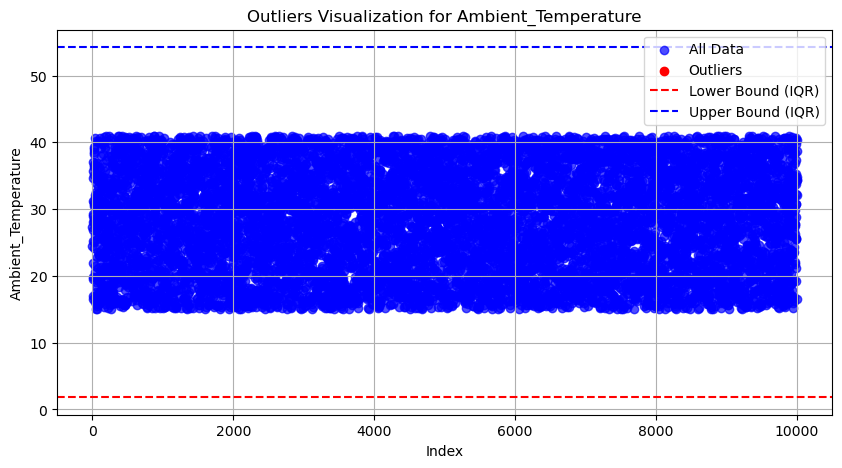

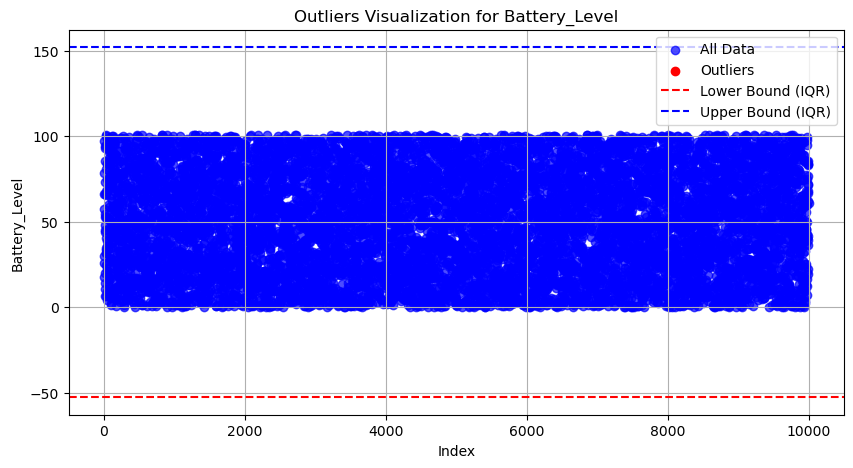

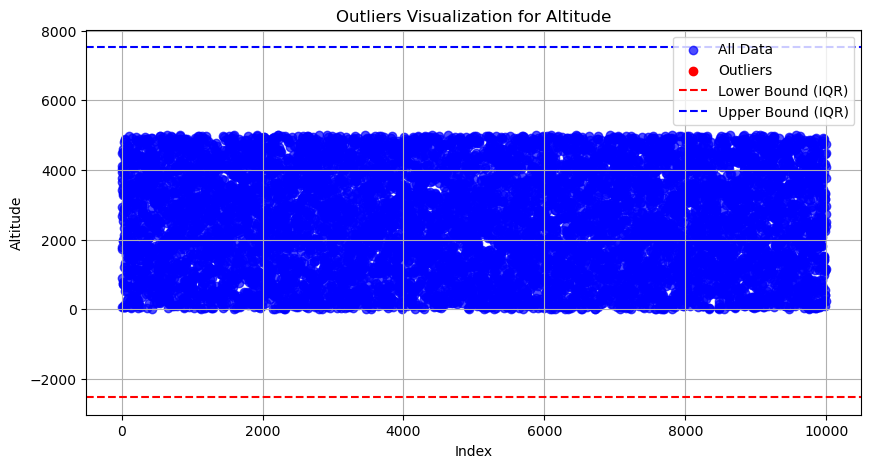

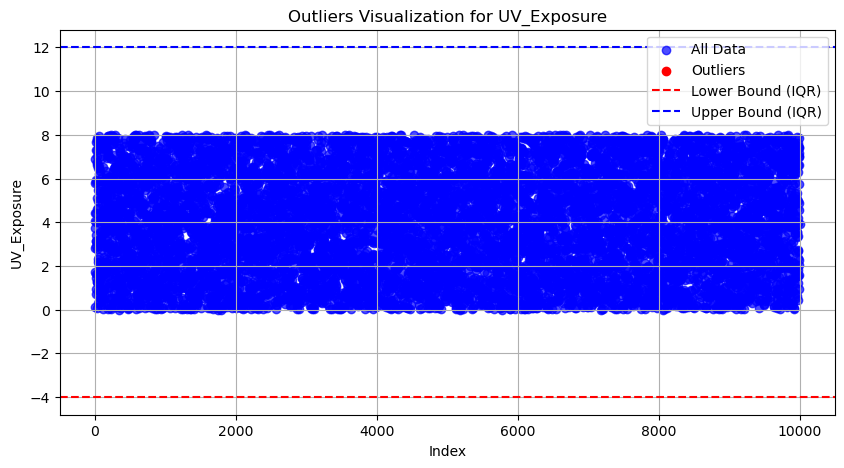

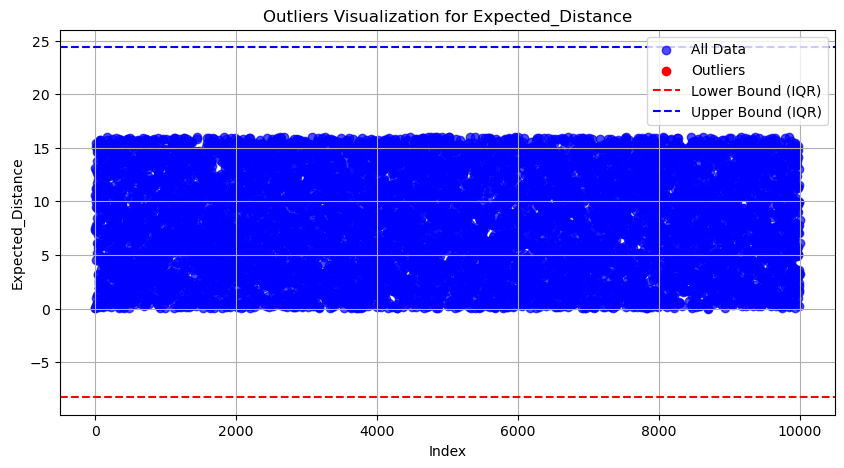

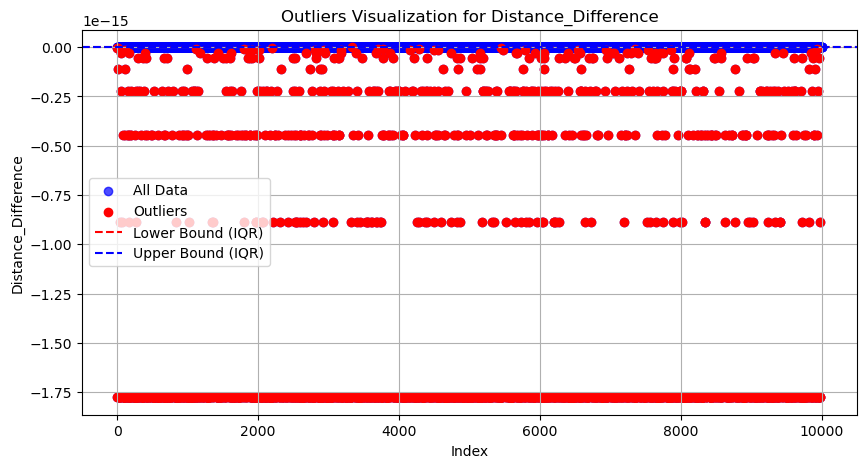

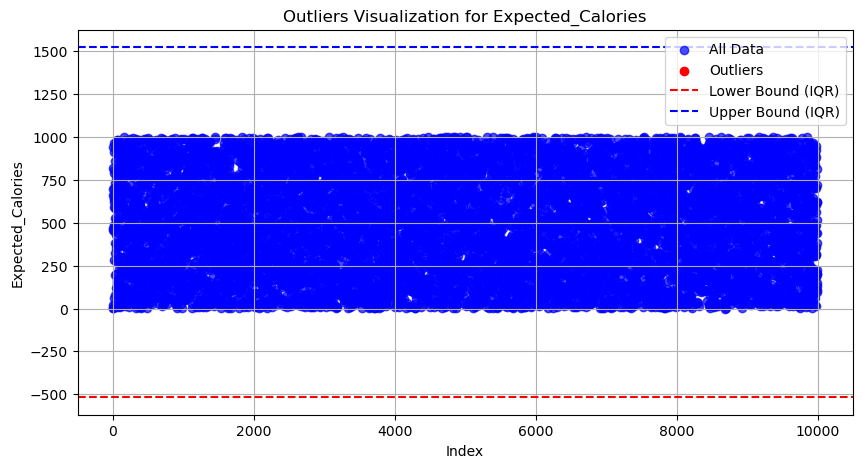

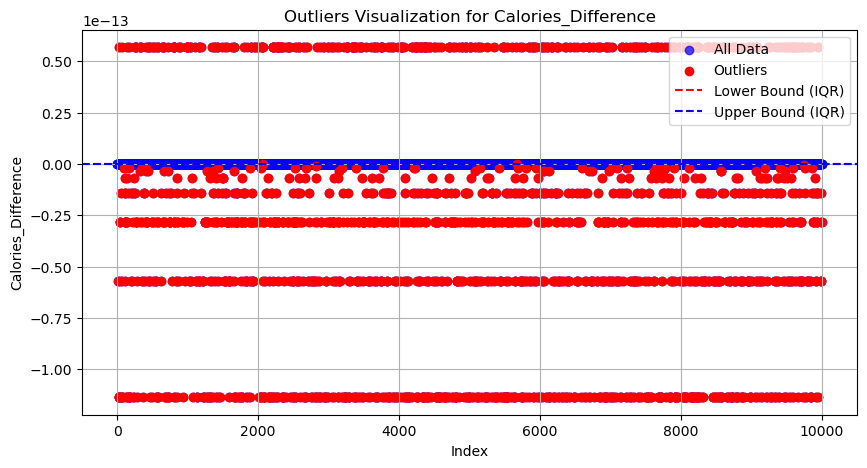

In [50]:
import matplotlib.pyplot as plt

for col in numeric_cols:
    q1 = final_df[col].quantile(0.25)
    q3 = final_df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    plt.figure(figsize=(10, 5))
    plt.scatter(final_df.index, final_df[col], alpha=0.7, label='All Data', color='blue')
    
    outliers = final_df[(final_df[col] < lower_bound) | (final_df[col] > upper_bound)]
    plt.scatter(outliers.index, outliers[col], color='red', label='Outliers')
    
    plt.axhline(lower_bound, color='red', linestyle='--', label='Lower Bound (IQR)')
    plt.axhline(upper_bound, color='blue', linestyle='--', label='Upper Bound (IQR)')
    
    plt.title(f'Outliers Visualization for {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    plt.grid()
    plt.show()

Tylko Deep Sleep Duration ma wartosci odstajace, ale jako, ze generalnie jest to waski zakres liczbowy to moze tak tego nie widac mocno- nie jest to za mocno zaakcentowane wizualnie jako wartosc odstajaca.

Analiza wartości odstających (kategoryczne kolumny)


In [58]:
categorical_cols = final_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Kolumny kategoryczne w final_df:")
print(categorical_cols)

Kolumny kategoryczne w final_df:
['User_ID', 'Gender', 'Medical_Conditions', 'Medication', 'Smoker', 'Alcohol_Consumption', 'Timestamp_x', 'Day_of_Week', 'Snoring', 'ECG', 'Stress_Level', 'Mood', 'Timestamp_y', 'Timestamp', 'Exercise_Type', 'Exercise_Intensity']


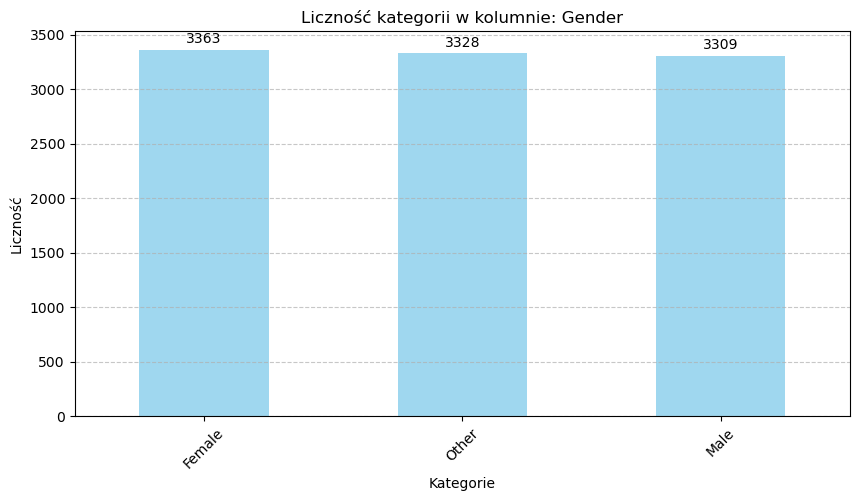

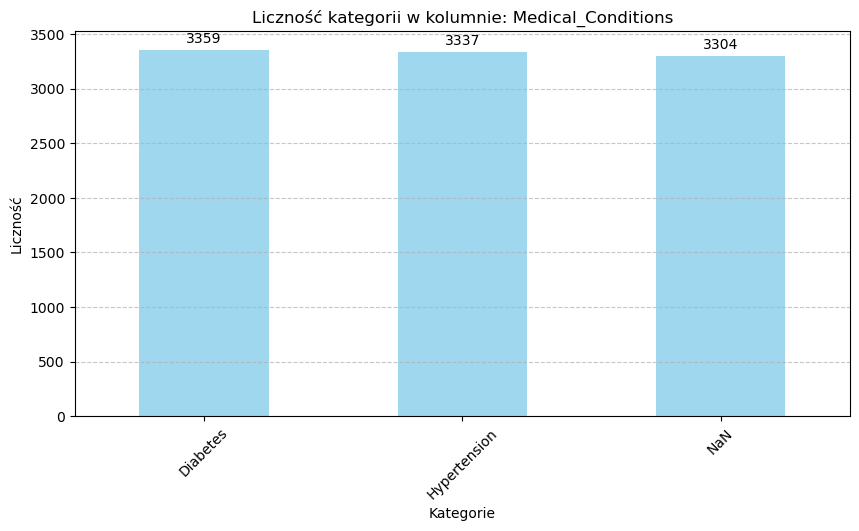

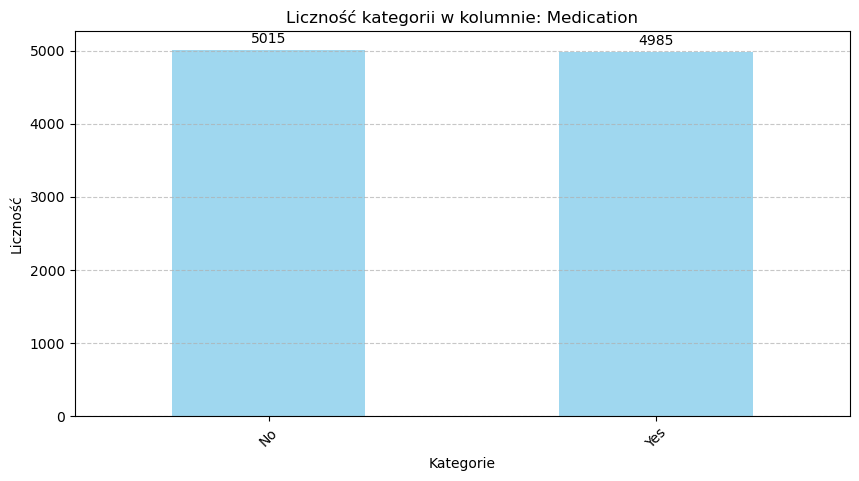

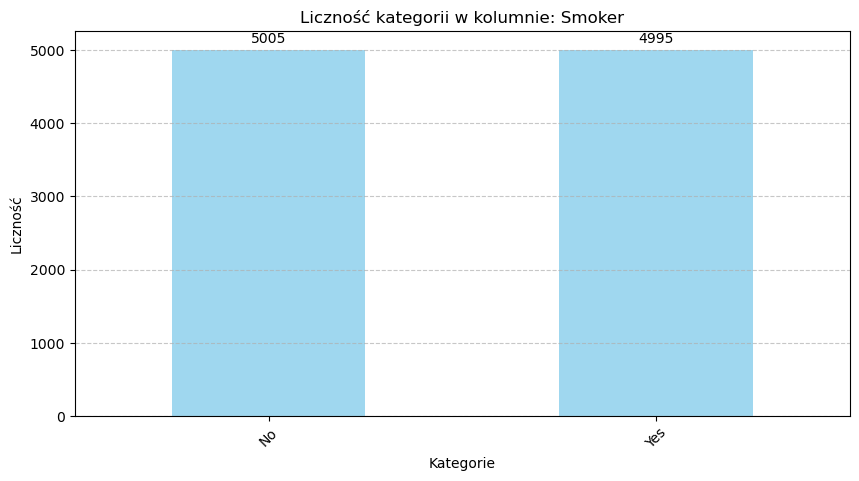

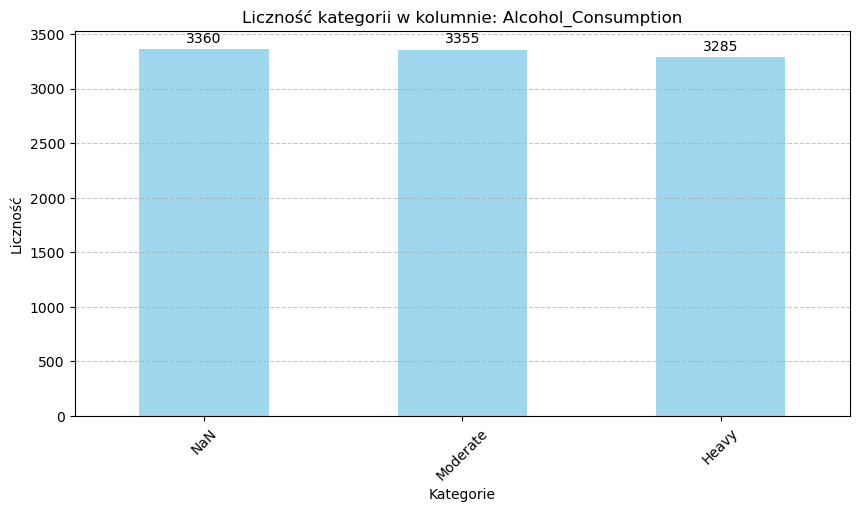

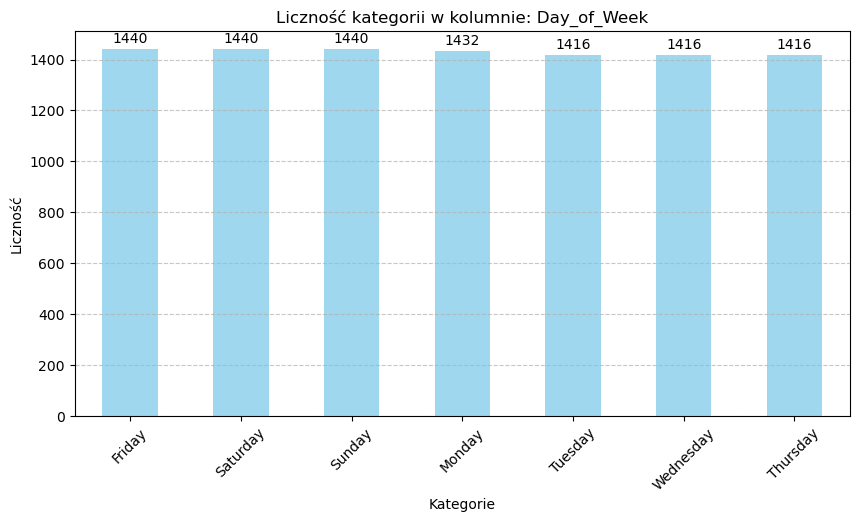

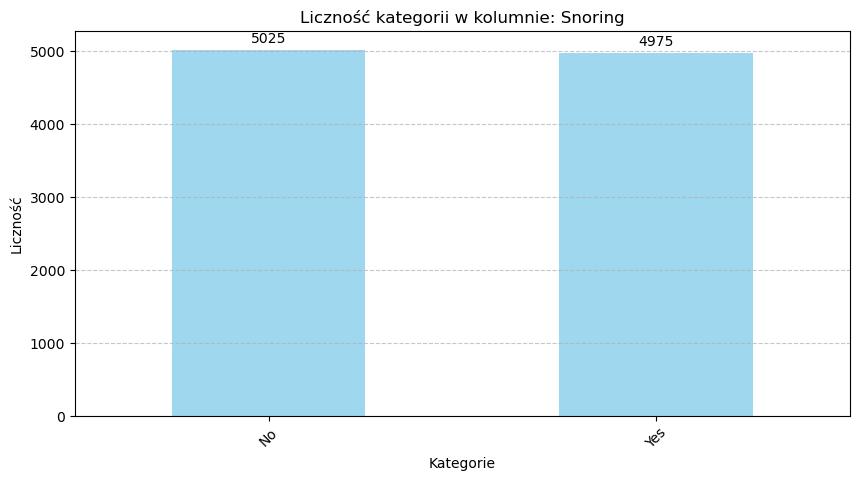

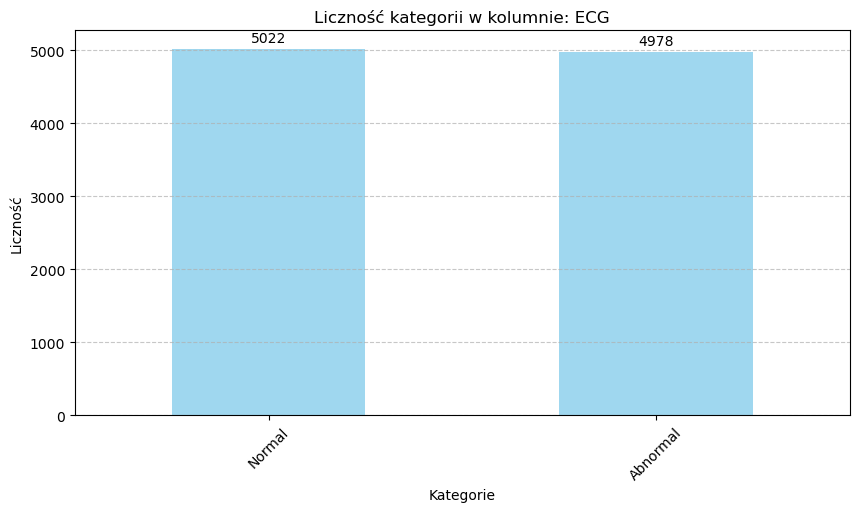

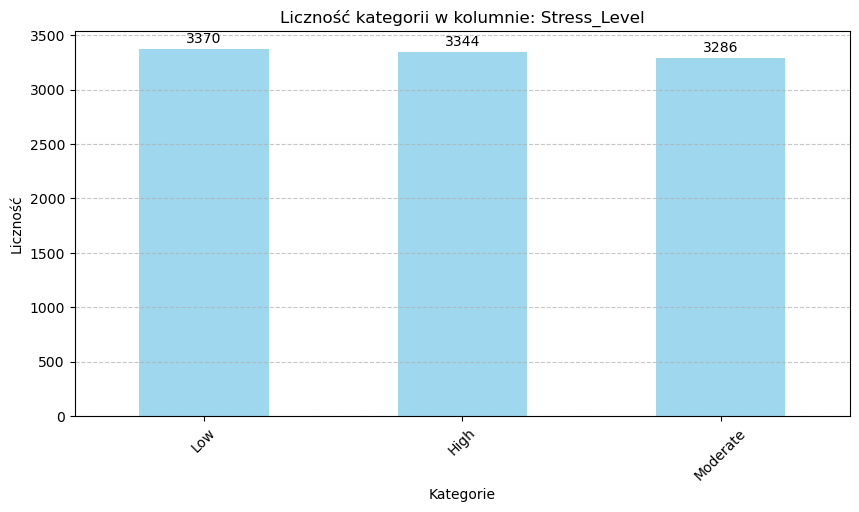

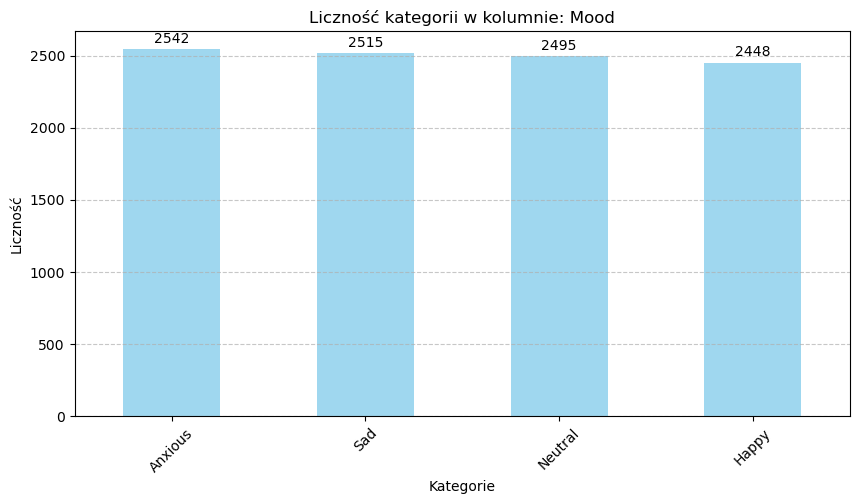

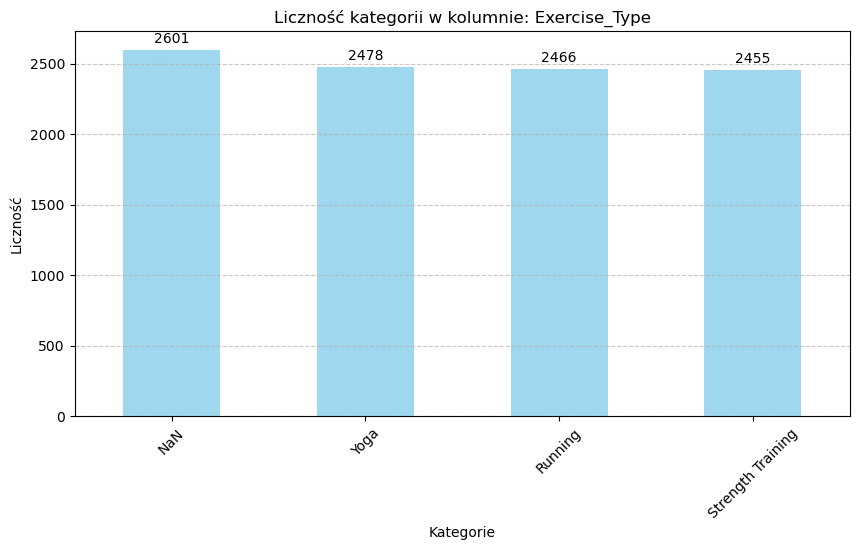

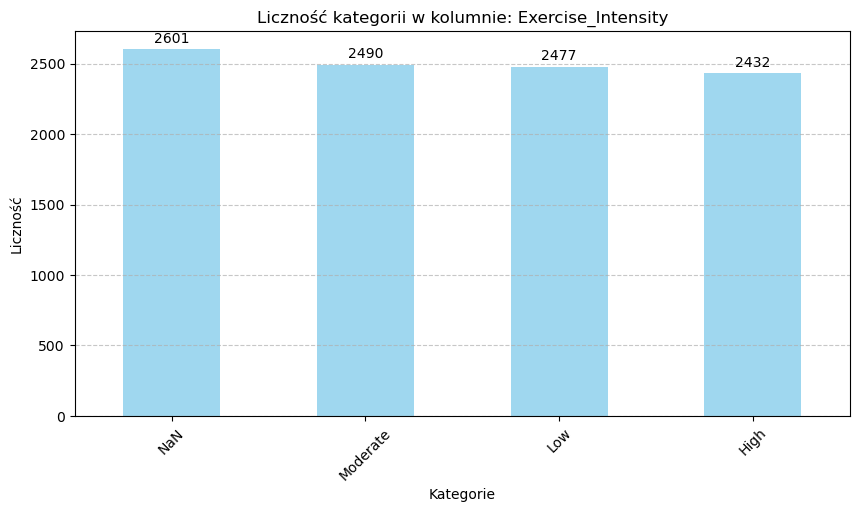

In [59]:
exclude_columns = ["User_ID", "Timestamp_x", "Timestamp_y", "Timestamp"] 

for col in categorical_cols:
    if col not in exclude_columns: 
        plt.figure(figsize=(10, 5))
       
        counts = final_df[col].fillna('NaN').value_counts()
        ax = counts.plot(kind='bar', color='skyblue', alpha=0.8)

     
        for idx, value in enumerate(counts.values):
            ax.annotate(str(value), xy=(idx, value), xytext=(0, 5), 
                        textcoords='offset points', ha='center', fontsize=10)

        plt.title(f"Liczność kategorii w kolumnie: {col}")
        plt.xlabel("Kategorie")
        plt.ylabel("Liczność")
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

Dystans VS Liczba krokow 

In [61]:
stride_length = 0.0008
final_df['Expected_Distance'] = final_df['Steps'] * stride_length

In [62]:
final_df['Distance_Difference'] = final_df['Distance_Covered'] - final_df['Expected_Distance']
print(final_df['Distance_Difference'].describe())

count    1.000000e+04
mean    -2.646197e-16
std      6.137956e-16
min     -1.776357e-15
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      0.000000e+00
Name: Distance_Difference, dtype: float64


In [63]:
tolerance = 0.1
final_df['Within_Tolerance'] = (
    (final_df['Distance_Difference'].abs() <= final_df['Expected_Distance'] * tolerance)
)

In [64]:
anomalies = final_df[~final_df['Within_Tolerance']]

print(f"Liczba nieprawidłowości: {len(anomalies)}")
print(anomalies[['Steps', 'Distance_Covered', 'Expected_Distance', 'Distance_Difference']])

Liczba nieprawidłowości: 0
Empty DataFrame
Columns: [Steps, Distance_Covered, Expected_Distance, Distance_Difference]
Index: []


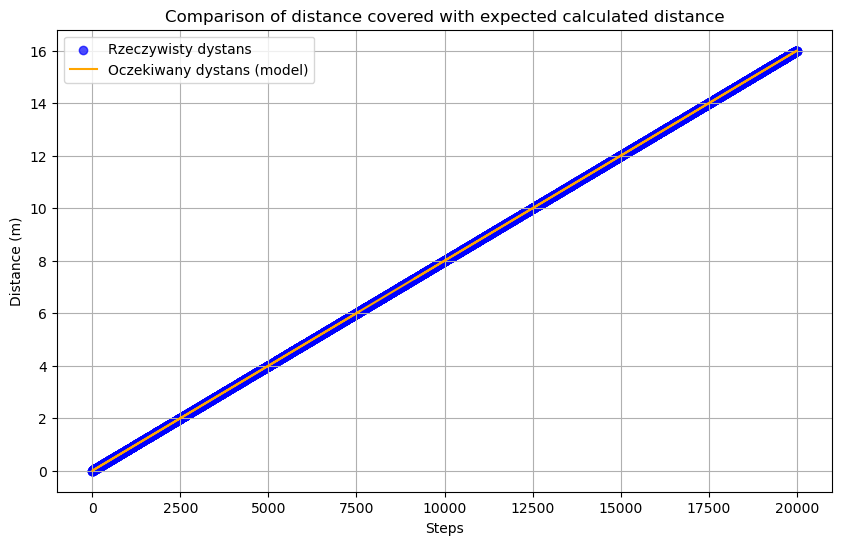

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Steps'], final_df['Distance_Covered'], alpha=0.7, label='Rzeczywisty dystans', color='blue')
plt.plot(final_df['Steps'], final_df['Expected_Distance'], color='orange', label='Oczekiwany dystans (model)')
plt.title("Comparison of distance covered with expected calculated distance")
plt.xlabel("Steps")
plt.ylabel("Distance (m)")
plt.legend()
plt.grid()
plt.show()

Dane musze byc wygenerowane wg wzoru- pewnie aplikacja tak mierzy. 

Sprawdzenie podobnej zaleznosci kalorie burned przy x krokach.

In [ ]:
calories_coefficient = 0.05

final_df['Expected_Calories'] = final_df['Steps'] * calories_coefficient

In [ ]:
final_df['Calories_Difference'] = final_df['Calories_Burned'] - final_df['Expected_Calories']

print(final_df['Calories_Difference'].describe())

count    1.000000e+04
mean    -5.801210e-15
std      2.700218e-14
min     -1.136868e-13
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.684342e-14
Name: Calories_Difference, dtype: float64


In [ ]:
tolerance = 0.1
final_df['Within_Tolerance'] = (
    (final_df['Calories_Difference'].abs() <= final_df['Expected_Calories'] * tolerance)
)

anomalies = final_df[~final_df['Within_Tolerance']]

print(f"Liczba nieprawidłowości: {len(anomalies)}")

Liczba nieprawidłowości: 0


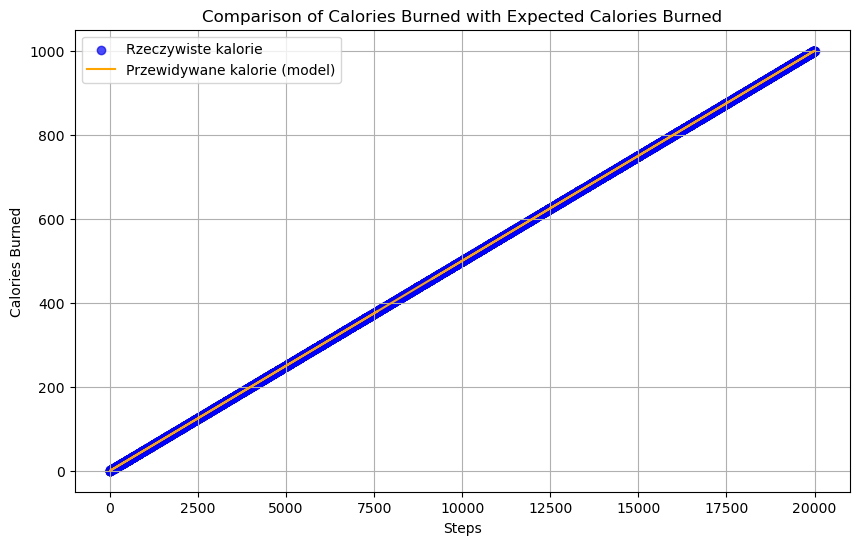

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Steps'], final_df['Calories_Burned'], alpha=0.7, label='Rzeczywiste kalorie', color='blue')
plt.plot(final_df['Steps'], final_df['Expected_Calories'], color='orange', label='Przewidywane kalorie (model)')
plt.title("Comparison of Calories Burned with Expected Calories Burned")
plt.xlabel("Steps")
plt.ylabel("Calories Burned")
plt.legend()
plt.grid()
plt.show()

Podobny mechanizm.

Future Importance dla health score. 

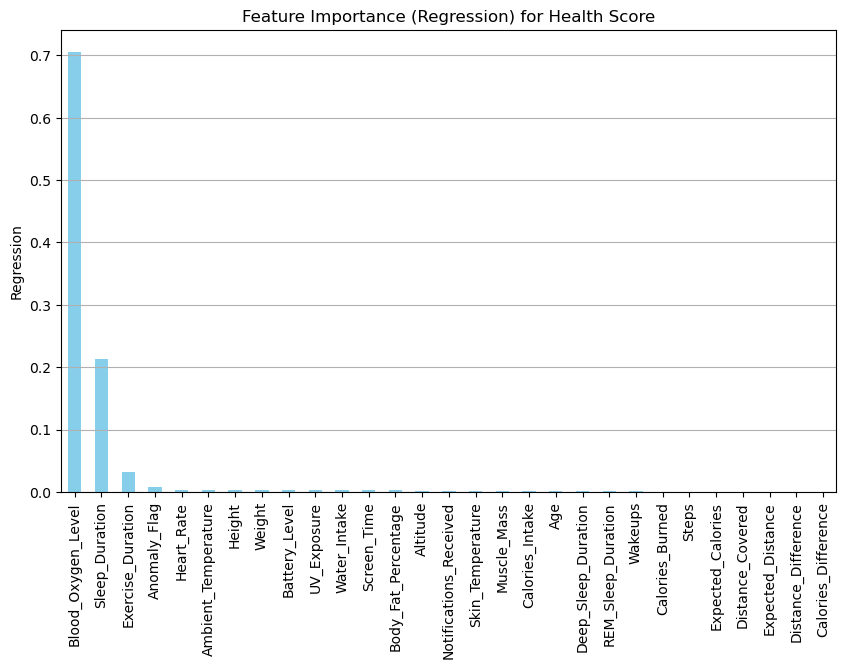

In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

numeric_cols = final_df.select_dtypes(include=['number']).columns.tolist()
target_col = 'Health_Score'
numeric_cols_FI = [col for col in numeric_cols if col != target_col]

X = final_df[numeric_cols_FI]
y = final_df[target_col]       

X = X.fillna(X.median())

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importance = pd.Series(model.feature_importances_, index=X.columns)

importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Feature Importance (Regression) for Health Score")
plt.ylabel("Regression")
plt.grid(axis='y')
plt.show()


Future Importance dla Anomaly Flag

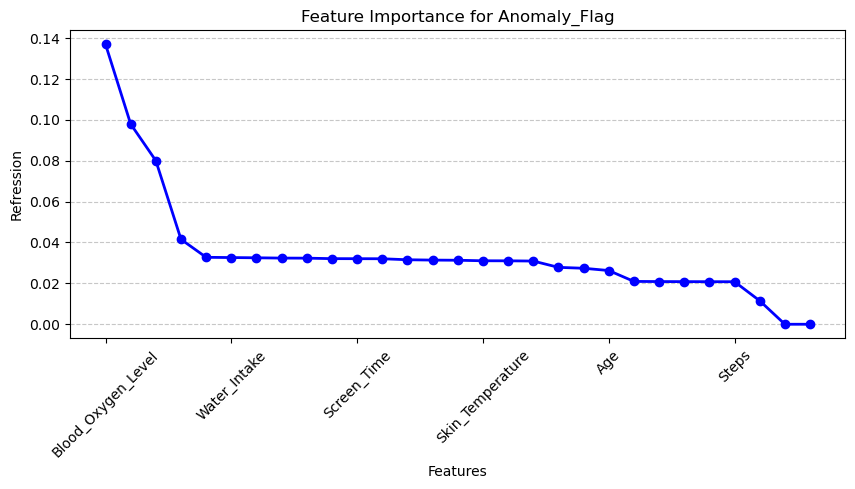

In [72]:
from sklearn.ensemble import RandomForestClassifier
numeric_cols = final_df.select_dtypes(include=['number']).columns.tolist()

target_col = 'Anomaly_Flag'
numeric_cols_FI_2 = [col for col in numeric_cols if col != target_col]

X = final_df[numeric_cols_FI_2] 
y = final_df[target_col]  

X = X.fillna(X.median())

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importance = pd.Series(model.feature_importances_, index=X.columns)

importance.sort_values(ascending=False).plot(
    kind='line', 
    figsize=(10, 4), 
    marker='o', 
    linestyle='-', 
    color='blue', 
    linewidth=2
)
plt.title("Feature Importance for Anomaly_Flag")
plt.xlabel("Features")
plt.ylabel("Refression")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Powzyej kluczowe cechy, które model uważa za najbardziej istotne dla przewidywania zmiennej docelowej (Anomaly_Flag)- Najwiekszy wplyw na anomalie. 

In [71]:
print(importance)
print(f"Liczba cech: {len(importance)}")


Age                       0.026285
Weight                    0.030921
Height                    0.031035
Sleep_Duration            0.041546
Deep_Sleep_Duration       0.032517
REM_Sleep_Duration        0.031393
Wakeups                   0.011487
Heart_Rate                0.080041
Blood_Oxygen_Level        0.136992
Calories_Intake           0.032099
Water_Intake              0.032632
Skin_Temperature          0.031061
Body_Fat_Percentage       0.032753
Muscle_Mass               0.031559
Health_Score              0.097961
Notifications_Received    0.027396
Screen_Time               0.032078
Steps                     0.020807
Calories_Burned           0.020886
Distance_Covered          0.020853
Exercise_Duration         0.027841
Ambient_Temperature       0.031315
Battery_Level             0.032337
Altitude                  0.032048
UV_Exposure               0.032375
Expected_Distance         0.020827
Distance_Difference       0.000000
Expected_Calories         0.020956
Calories_Difference 

In [ ]:
#looknac na steps w ciagu dnia - timestype

CELE:

Model Wykrywajacy anomalie, które mogą wskazywać na przetrenowanie lub problemy zdrowotne.
(Isolation Forest- Wykrycie nietypowych wyników może wskazywać na problemy zdrowotne, przetrenowanie lub błędy w danych.
, który działa na zasadzie izolowania nietypowych punktów w danych. Algorytm buduje wiele losowych drzew decyzyjnych i próbuje odizolować poszczególne punkty. Punkty, które są łatwo izolowane (znajdują się w rzadkich obszarach danych), są uznawane za anomalie.

Przewiduje spalone kalorie na podstawie danych z wearables (np. liczba kroków, tętno, czas snu).
(bierzemy cechy typu steps, heart rate, sleep duration, oxygen level i uzywamy RandomForestRegressor zeby nam to zaplanowal. to bedzie ciagla dlatego regressor a classifier). 
y to bedzie calories burned ALBO Health score przy jakis innych zmiennych).
Prognozowanie spalania kalorii może być użyte do dostosowania obciążenia treningowego.


Klasyfikuje poziom aktywności sportowca (np. "niska", "średnia", "wysoka"). 
(tutaj uzyjemy random forest ale juz classifire, bo bedziemy klasyfikowac do jakiejs grupy tez za pomoca roznych cech.
Y to bedzie Activity_Level - juz jest w dancyh, wiec nie clustering. )
Klasyfikacja poziomu aktywności pomaga monitorować i porównywać poziomy treningowe różnych sportowców.



In [76]:
# ja mysle e to anomaly to juz jest po Isolation Forest zrobione